###### _DZ Cars Market Challenge

In [1]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.exceptions
import re #REGEX
from skopt import BayesSearchCV
from scipy.stats import f_oneway
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression


# Loading data...

In [3]:
df = pd.read_csv('DZ_Cars_Market_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6519 non-null   int64  
 1   Name                           6519 non-null   object 
 2   Wilaya                         6519 non-null   object 
 3   Year                           6519 non-null   int64  
 4   Kilometers_Driven              6519 non-null   int64  
 5   Fuel_Type                      6519 non-null   object 
 6   Transmission                   6519 non-null   object 
 7   Owner_Type                     6519 non-null   object 
 8   Mileage                        6517 non-null   object 
 9   Engine                         6477 non-null   object 
 10  Power                          6477 non-null   object 
 11  Seats                          6471 non-null   float64
 12  New_Price                      6519 non-null   o

In [5]:
df.nunique()

Unnamed: 0                       6019
Name                             1876
Wilaya                             48
Year                               22
Kilometers_Driven                3093
Fuel_Type                           5
Transmission                        2
Owner_Type                          4
Mileage                           442
Engine                            146
Power                             372
Seats                               9
New_Price                         541
Price                            1331
Age                                22
Price_per_KM                     5038
Brand                              31
Condition                           3
Country                             1
Maintenance_Cost                 5432
Wilaya_ID                          47
Matricule                        6019
Accident History                    6
Maintenance Frequency               5
Fuel Efficiency Rating (km/l)    1472
Insurance Expiry Date            1646
Vehicle Usag

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6019 non-null   int64  
 1   Name                           6019 non-null   object 
 2   Wilaya                         6019 non-null   object 
 3   Year                           6019 non-null   int64  
 4   Kilometers_Driven              6019 non-null   int64  
 5   Fuel_Type                      6019 non-null   object 
 6   Transmission                   6019 non-null   object 
 7   Owner_Type                     6019 non-null   object 
 8   Mileage                        6017 non-null   object 
 9   Engine                         5983 non-null   object 
 10  Power                          5983 non-null   object 
 11  Seats                          5977 non-null   float64
 12  New_Price                      6019 non-null   object

dropping duplicated rows

In [7]:
df.nunique()

Unnamed: 0                       6019
Name                             1876
Wilaya                             48
Year                               22
Kilometers_Driven                3093
Fuel_Type                           5
Transmission                        2
Owner_Type                          4
Mileage                           442
Engine                            146
Power                             372
Seats                               9
New_Price                         541
Price                            1331
Age                                22
Price_per_KM                     5038
Brand                              31
Condition                           3
Country                             1
Maintenance_Cost                 5432
Wilaya_ID                          47
Matricule                        6019
Accident History                    6
Maintenance Frequency               5
Fuel Efficiency Rating (km/l)    1472
Insurance Expiry Date            1646
Vehicle Usag

In [8]:
df.isnull().sum()

Unnamed: 0                         0
Name                               0
Wilaya                             0
Year                               0
Kilometers_Driven                  0
Fuel_Type                          0
Transmission                       0
Owner_Type                         0
Mileage                            2
Engine                            36
Power                             36
Seats                             42
New_Price                          0
Price                              0
Age                                0
Price_per_KM                     300
Brand                              0
Condition                          0
Country                            0
Maintenance_Cost                   0
Wilaya_ID                        117
Matricule                          0
Accident History                   0
Maintenance Frequency              0
Fuel Efficiency Rating (km/l)      0
Insurance Expiry Date              0
Vehicle Usage                      0
d

The country column does not make any sense since it has only one value, so we drop it

In [9]:
df = df.drop(columns=['Country'])

In [10]:
df['Wilaya'].unique()

array(['Djijel', 'Biskra', 'Aïn Témouchent', 'Oum El Bouaghi', 'Naâma',
       'Tipaza', 'Illizi', 'Tiaret', 'Bejaïa', 'Tamanrasset', 'Oran',
       'Tizi Ouzou', 'El Tarf', 'Saïda', 'Blida', 'Boumerdès', 'Guelma',
       'El Oued', "M'Sila", 'Laghouat', 'Khenchela', 'Mostaganem', 'Mila',
       'Mascara', 'Ouargla', 'Relizane', 'Tlemcen', 'Constantine',
       'Tindouf', 'Skikda', 'Béchar', 'Ghardaia', 'Souk Ahras',
       'Bordj Bou Arreridj', 'Tissemsilt', 'Sétif', 'Chlef', 'Bouira',
       'El Bayadh', 'Adrar', 'Médéa', 'Alger', 'Aïn Defla', 'Djelfa',
       'Batna', 'Sidi Bel Abbès', 'Tebessa', 'Annaba'], dtype=object)

Create mapping for Wilaya to use Wilaya_ID, since wilaya_ID has some missing values

In [11]:
wilayas = {
    'Adrar': 1,
    'Chlef': 2,
    'Laghouat': 3,
    'Oum El Bouaghi': 4,
    'Batna': 5,
    'Bejaïa': 6,
    'Biskra': 7,
    'Béchar': 8,
    'Blida': 9,
    'Bouira': 10,
    'Tamanrasset': 11,
    'Tebessa': 12,
    'Tlemcen': 13,
    'Tiaret': 14,
    'Tizi Ouzou': 15,
    'Alger': 16,
    'Djelfa': 17,
    'Djijel': 18,
    'Sétif': 19,
    'Saïda': 20,
    'Skikda': 21,
    'Sidi Bel Abbès': 22,
    'Annaba': 23,
    'Guelma': 24,
    'Constantine': 25,
    'Médéa': 26,
    'Mostaganem': 27,
    "M'Sila": 28,
    'Mascara': 29,
    'Ouargla': 30,
    'Oran': 31,
    'El Bayadh': 32,
    'Illizi': 33,
    'Bordj Bou Arreridj': 34,
    'Boumerdès': 35,
    'El Tarf': 36,
    'Tindouf': 37,
    'Tissemsilt': 38,
    'El Oued': 39,
    'Khenchela': 40,
    'Souk Ahras': 41,
    'Tipaza': 42,
    'Mila': 43,
    'Aïn Defla': 44,
    'Naâma': 45,
    'Aïn Témouchent': 46,
    'Ghardaia': 47,
    'Relizane': 48
}
df = df.replace({"Wilaya": wilayas})
df['Wilaya'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6019 non-null   int64  
 1   Name                           6019 non-null   object 
 2   Wilaya                         6019 non-null   int64  
 3   Year                           6019 non-null   int64  
 4   Kilometers_Driven              6019 non-null   int64  
 5   Fuel_Type                      6019 non-null   object 
 6   Transmission                   6019 non-null   object 
 7   Owner_Type                     6019 non-null   object 
 8   Mileage                        6017 non-null   object 
 9   Engine                         5983 non-null   object 
 10  Power                          5983 non-null   object 
 11  Seats                          5977 non-null   float64
 12  New_Price                      6019 non-null   object

In [12]:
df = df.drop(columns=['Wilaya_ID'])
df = df.rename(columns={'Wilaya': 'Wilaya_ID'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6019 non-null   int64  
 1   Name                           6019 non-null   object 
 2   Wilaya_ID                      6019 non-null   int64  
 3   Year                           6019 non-null   int64  
 4   Kilometers_Driven              6019 non-null   int64  
 5   Fuel_Type                      6019 non-null   object 
 6   Transmission                   6019 non-null   object 
 7   Owner_Type                     6019 non-null   object 
 8   Mileage                        6017 non-null   object 
 9   Engine                         5983 non-null   object 
 10  Power                          5983 non-null   object 
 11  Seats                          5977 non-null   float64
 12  New_Price                      6019 non-null   object

'Matricule' represents unique indetifier better than 'Unnamed: 0' 

In [14]:
df = df.drop(columns=['Unnamed: 0'])
matricule_column = df.pop('Matricule')
df.insert(0, 'Matricule', matricule_column)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Matricule                      6019 non-null   object 
 1   Name                           6019 non-null   object 
 2   Wilaya_ID                      6019 non-null   int64  
 3   Year                           6019 non-null   int64  
 4   Kilometers_Driven              6019 non-null   int64  
 5   Fuel_Type                      6019 non-null   object 
 6   Transmission                   6019 non-null   object 
 7   Owner_Type                     6019 non-null   object 
 8   Mileage                        6017 non-null   object 
 9   Engine                         5983 non-null   object 
 10  Power                          5983 non-null   object 
 11  Seats                          5977 non-null   float64
 12  New_Price                      6019 non-null   object

In [15]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [16]:
df['Name'].head(100)

0                   Maruti Wagon R LXI CNG
1         Hyundai Creta 1.6 CRDi SX Option
2                             Honda Jazz V
3                        Maruti Ertiga VDI
4          Audi A4 New 2.0 TDI Multitronic
                      ...                 
95                   Honda Amaze SX i-DTEC
96    Volkswagen Polo Diesel Highline 1.2L
97     Hyundai Verna Transform SX VGT CRDi
98                Maruti Wagon R VXI BS IV
99    Volkswagen Polo Petrol Highline 1.6L
Name: Name, Length: 100, dtype: object

In [17]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [158]:
# Convert 'Name' column to lowercase and strip spaces
df['Name'] = df['Name'].str.lower().str.strip()

# Group by 'Name' and fill missing values in each group with mode
fill_cols = ['Mileage', 'Engine', 'Power', 'Seats']
for col in fill_cols:
    df[col] = df.groupby('Name')[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

# Display the DataFrame to verify changes
print(df.head())
df.isnull().sum()

KeyError: 'Name'

In [19]:
# Filter rows where 'Power', 'Engine', 'Seats', and 'Mileage' are null
null_power_rows = df[df['Power'].isnull()]['Name']
null_engine_rows = df[df['Engine'].isnull()]['Name']
null_seats_rows = df[df['Seats'].isnull()]['Name']
null_mileage_rows = df[df['Mileage'].isnull()]['Name']

# Display the 'Name' of rows where 'Power', 'Engine', 'Seats', and 'Mileage' are null
print("Names of rows where 'Power' is null:")
print(null_power_rows)

print("\nNames of rows where 'Engine' is null:")
print(null_engine_rows)

print("\nNames of rows where 'Seats' is null:")
print(null_seats_rows)

print("\nNames of rows where 'Mileage' is null:")
print(null_mileage_rows)


Names of rows where 'Power' is null:
208                             maruti swift 1.3 vxi
733                             maruti swift 1.3 vxi
749                     land rover range rover 3.0 d
1294                               honda city 1.3 dx
1327                            maruti swift 1.3 zxi
1460    land rover range rover sport 2005 2012 sport
2074                            maruti swift 1.3 lxi
2096                       hyundai santro lp zipplus
2325                        maruti swift 1.3 vxi abs
2335                            maruti swift 1.3 vxi
2530                         bmw 5 series 520d sedan
2542                 hyundai santro gls ii - euro ii
2623                         bmw 5 series 520d sedan
2668                            maruti swift 1.3 vxi
2737                               maruti wagon r vx
2780                 hyundai santro gls ii - euro ii
2842                 hyundai santro gls ii - euro ii
3272                         bmw 5 series 520d sedan
3404     

In [20]:
# Group by 'Name' and fill missing values in each group with mode
for col in ['Power', 'Engine', 'Seats', 'Mileage']:
    df[col] = df.groupby('Name')[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


In [21]:
df.isnull().sum()

Matricule                          0
Name                               0
Wilaya_ID                          0
Year                               0
Kilometers_Driven                  0
Fuel_Type                          0
Transmission                       0
Owner_Type                         0
Mileage                            2
Engine                            31
Power                             31
Seats                             36
New_Price                          0
Price                              0
Age                                0
Price_per_KM                     300
Brand                              0
Condition                          0
Maintenance_Cost                   0
Accident History                   0
Maintenance Frequency              0
Fuel Efficiency Rating (km/l)      0
Insurance Expiry Date              0
Vehicle Usage                      0
dtype: int64

We grouped by 'Name' to fill the missing values of  Engine, Power, Seats, Mileage                      

In [22]:
def clean_column(cell):
    import re
    if pd.isna(cell):
        return cell
    else:
        # Regular expression pattern to match the string until the first whitespace or newline
        pattern = r'^\S+'
        # Find the first match in the cell using regex
        match = re.search(pattern, cell)
        if match:
            return match.group()
        else:
            return ''

In [23]:
df.head()
print(df['Price'])

0                   232.82 DZ
1                      nan DZ
2                   598.68 DZ
3                   798.24 DZ
4       2360.1295999999998 DZ
                ...          
6014     631.9399999999999 DZ
6015                532.16 DZ
6016               385.816 DZ
6017               352.556 DZ
6018    332.59999999999997 DZ
Name: Price, Length: 6019, dtype: object


Stripping...

In [24]:
df['Engine'] = df['Engine'].apply(clean_column)
df['Mileage'] = df['Mileage'].apply(clean_column)
df['Maintenance_Cost'] = df['Maintenance_Cost'].apply(clean_column)
df['New_Price'] = df['New_Price'].apply(clean_column)
df['Price'] = df['Price'].apply(clean_column)
df['Power'] = df['Power'].apply(clean_column)

In [25]:
df['Engine'] = df['Engine'].astype('float')
df['Mileage'] = df['Mileage'].astype('float')
df['Maintenance_Cost'] = df['Maintenance_Cost'].astype('float')
df['Price'] = df['Price'].astype('float')
df['New_Price'] = df['New_Price'].astype('float')
df['Power'] = df['Power'].replace('null', np.nan)
df['Power'] = df['Power'].astype('float')


In [26]:
df.isnull().sum()
df.dtypes
print(df.isna().sum())

Matricule                           0
Name                                0
Wilaya_ID                           0
Year                                0
Kilometers_Driven                   0
Fuel_Type                           0
Transmission                        0
Owner_Type                          0
Mileage                             2
Engine                             31
Power                             138
Seats                              36
New_Price                        5195
Price                             300
Age                                 0
Price_per_KM                      300
Brand                               0
Condition                           0
Maintenance_Cost                    0
Accident History                    0
Maintenance Frequency               0
Fuel Efficiency Rating (km/l)       0
Insurance Expiry Date               0
Vehicle Usage                       0
dtype: int64


Null values changed since the 'null' strings are actually nan

In [27]:
print(df['Price'])

0        232.8200
1             NaN
2        598.6800
3        798.2400
4       2360.1296
          ...    
6014     631.9400
6015     532.1600
6016     385.8160
6017     352.5560
6018     332.6000
Name: Price, Length: 6019, dtype: float64


In [28]:
df.dtypes

Matricule                         object
Name                              object
Wilaya_ID                          int64
Year                               int64
Kilometers_Driven                  int64
Fuel_Type                         object
Transmission                      object
Owner_Type                        object
Mileage                          float64
Engine                           float64
Power                            float64
Seats                            float64
New_Price                        float64
Price                            float64
Age                                int64
Price_per_KM                     float64
Brand                             object
Condition                         object
Maintenance_Cost                 float64
Accident History                  object
Maintenance Frequency             object
Fuel Efficiency Rating (km/l)    float64
Insurance Expiry Date             object
Vehicle Usage                     object
dtype: object

In [29]:
df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True) #drop missing values since they are neglected in number

In [30]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Matricule                      5878 non-null   object 
 1   Name                           5878 non-null   object 
 2   Wilaya_ID                      5878 non-null   int64  
 3   Year                           5878 non-null   int64  
 4   Kilometers_Driven              5878 non-null   int64  
 5   Fuel_Type                      5878 non-null   object 
 6   Transmission                   5878 non-null   object 
 7   Owner_Type                     5878 non-null   object 
 8   Mileage                        5878 non-null   float64
 9   Engine                         5878 non-null   float64
 10  Power                          5878 non-null   float64
 11  Seats                          5878 non-null   float64
 12  New_Price                      823 non-null    float6

In [31]:
df.drop(columns=['Wilaya_ID'], inplace=True) #not needed for predecting the price (jusifications in the visualisation section)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 0 to 6018
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Matricule                      5878 non-null   object 
 1   Name                           5878 non-null   object 
 2   Year                           5878 non-null   int64  
 3   Kilometers_Driven              5878 non-null   int64  
 4   Fuel_Type                      5878 non-null   object 
 5   Transmission                   5878 non-null   object 
 6   Owner_Type                     5878 non-null   object 
 7   Mileage                        5878 non-null   float64
 8   Engine                         5878 non-null   float64
 9   Power                          5878 non-null   float64
 10  Seats                          5878 non-null   float64
 11  New_Price                      823 non-null    float64
 12  Price                          5588 non-null   float6

In [33]:
columns_to_drop = ['Insurance Expiry Date', 'Age', 'New_Price'] #New_price has been dropped because it has so many missing value, age could be deduced from the year, Insurance Expiry Date could be neglected in the impact on the price predicition
df.drop(columns=columns_to_drop, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 0 to 6018
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Matricule                      5878 non-null   object 
 1   Name                           5878 non-null   object 
 2   Year                           5878 non-null   int64  
 3   Kilometers_Driven              5878 non-null   int64  
 4   Fuel_Type                      5878 non-null   object 
 5   Transmission                   5878 non-null   object 
 6   Owner_Type                     5878 non-null   object 
 7   Mileage                        5878 non-null   float64
 8   Engine                         5878 non-null   float64
 9   Power                          5878 non-null   float64
 10  Seats                          5878 non-null   float64
 11  Price                          5588 non-null   float64
 12  Price_per_KM                   5588 non-null   float6

In [35]:
 df.isna().sum()

Matricule                          0
Name                               0
Year                               0
Kilometers_Driven                  0
Fuel_Type                          0
Transmission                       0
Owner_Type                         0
Mileage                            0
Engine                             0
Power                              0
Seats                              0
Price                            290
Price_per_KM                     290
Brand                              0
Condition                          0
Maintenance_Cost                   0
Accident History                   0
Maintenance Frequency              0
Fuel Efficiency Rating (km/l)      0
Vehicle Usage                      0
dtype: int64

In [36]:
df.head()

,Matricule,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,Brand,Condition,Maintenance_Cost,Accident History,Maintenance Frequency,Fuel Efficiency Rating (km/l),Vehicle Usage
0,1787461018,maruti wagon r lxi cng,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,232.8200,0.003234,Maruti,Good,20371.0,M9elba Trab Hnin,Distributeur,17.54,Commercial
1,843838157,hyundai creta 1.6 crdi sx option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,NaN,Hyundai,Poor,1945.0,True,Quarterly,11.12,Rental
2,2636851118,honda jazz v,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,598.6800,0.013015,Honda,Poor,7299.0,True,cappuccino,14.46,Rental
3,7973331246,maruti ertiga vdi,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,798.2400,0.009175,Maruti,Excellent,13020.0,Sbigha haja 9lila,Quarterly,9.78,Commercial
4,7010351346,audi a4 new 2.0 tdi multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2360.1296,0.058031,Audi,Poor,12087.0,True,Annually,12.77,Commercial


In [37]:
# Drop 'Matricule' column
df.drop(columns=['Matricule'], inplace=True) #no need this for our model

# Drop rows with NaN values in 'Price' column
df.dropna(subset=['Price'], inplace=True)


In [38]:
 df.isna().sum()

Name                             0
Year                             0
Kilometers_Driven                0
Fuel_Type                        0
Transmission                     0
Owner_Type                       0
Mileage                          0
Engine                           0
Power                            0
Seats                            0
Price                            0
Price_per_KM                     0
Brand                            0
Condition                        0
Maintenance_Cost                 0
Accident History                 0
Maintenance Frequency            0
Fuel Efficiency Rating (km/l)    0
Vehicle Usage                    0
dtype: int64

In [39]:
df.dtypes

Name                              object
Year                               int64
Kilometers_Driven                  int64
Fuel_Type                         object
Transmission                      object
Owner_Type                        object
Mileage                          float64
Engine                           float64
Power                            float64
Seats                            float64
Price                            float64
Price_per_KM                     float64
Brand                             object
Condition                         object
Maintenance_Cost                 float64
Accident History                  object
Maintenance Frequency             object
Fuel Efficiency Rating (km/l)    float64
Vehicle Usage                     object
dtype: object

In [40]:
df['Fuel_Type'].unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [41]:
 # Perform one-hot encoding on 'Fuel_Type' column
df = pd.get_dummies(df, columns=['Fuel_Type'])
df.head() 

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Condition,Maintenance_Cost,Accident History,Maintenance Frequency,Fuel Efficiency Rating (km/l),Vehicle Usage,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,maruti wagon r lxi cng,2010,72000,Manual,First,26.60,998.0,58.16,5.0,232.8200,...,Good,20371.0,M9elba Trab Hnin,Distributeur,17.54,Commercial,True,False,False,False
2,honda jazz v,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,598.6800,...,Poor,7299.0,True,cappuccino,14.46,Rental,False,False,False,True
3,maruti ertiga vdi,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,798.2400,...,Excellent,13020.0,Sbigha haja 9lila,Quarterly,9.78,Commercial,False,True,False,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,2360.1296,...,Poor,12087.0,True,Annually,12.77,Commercial,False,True,False,False
5,hyundai eon lpg era plus option,2012,75000,Manual,First,21.10,814.0,55.20,5.0,312.6440,...,Good,11692.0,True,cappuccino,16.90,Commercial,False,False,True,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           5588 non-null   object 
 1   Year                           5588 non-null   int64  
 2   Kilometers_Driven              5588 non-null   int64  
 3   Transmission                   5588 non-null   object 
 4   Owner_Type                     5588 non-null   object 
 5   Mileage                        5588 non-null   float64
 6   Engine                         5588 non-null   float64
 7   Power                          5588 non-null   float64
 8   Seats                          5588 non-null   float64
 9   Price                          5588 non-null   float64
 10  Price_per_KM                   5588 non-null   float64
 11  Brand                          5588 non-null   object 
 12  Condition                      5588 non-null   object

In [43]:
df['Vehicle Usage'].unique()

array(['Commercial', 'Rental', 'Personal'], dtype=object)

In [44]:
# Perform one-hot encoding on 'Fuel_Type' column
df = pd.get_dummies(df, columns=['Vehicle Usage'])
df.head()


,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Accident History,Maintenance Frequency,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental
0,maruti wagon r lxi cng,2010,72000,Manual,First,26.60,998.0,58.16,5.0,232.8200,...,M9elba Trab Hnin,Distributeur,17.54,True,False,False,False,True,False,False
2,honda jazz v,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,598.6800,...,True,cappuccino,14.46,False,False,False,True,False,False,True
3,maruti ertiga vdi,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,798.2400,...,Sbigha haja 9lila,Quarterly,9.78,False,True,False,False,True,False,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,2360.1296,...,True,Annually,12.77,False,True,False,False,True,False,False
5,hyundai eon lpg era plus option,2012,75000,Manual,First,21.10,814.0,55.20,5.0,312.6440,...,True,cappuccino,16.90,False,False,True,False,True,False,False


In [45]:
df['Maintenance Frequency'].unique()

array(['Distributeur', 'cappuccino', 'Quarterly', 'Annually', 'Monthly'],
      dtype=object)

In [46]:
# Replace values in 'Maintenance Frequency' column
df['Maintenance Frequency'] = df['Maintenance Frequency'].replace({'Distributeur': 'irregular', 'cappuccino': 'irregular'})
df['Maintenance Frequency'].unique()

array(['irregular', 'Quarterly', 'Annually', 'Monthly'], dtype=object)

In [47]:
df.head()

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Accident History,Maintenance Frequency,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental
0,maruti wagon r lxi cng,2010,72000,Manual,First,26.60,998.0,58.16,5.0,232.8200,...,M9elba Trab Hnin,irregular,17.54,True,False,False,False,True,False,False
2,honda jazz v,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,598.6800,...,True,irregular,14.46,False,False,False,True,False,False,True
3,maruti ertiga vdi,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,798.2400,...,Sbigha haja 9lila,Quarterly,9.78,False,True,False,False,True,False,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,2360.1296,...,True,Annually,12.77,False,True,False,False,True,False,False
5,hyundai eon lpg era plus option,2012,75000,Manual,First,21.10,814.0,55.20,5.0,312.6440,...,True,irregular,16.90,False,False,True,False,True,False,False


In [48]:
df['Seats'] = df['Seats'].astype('int') 

In [49]:
df.dtypes

Name                              object
Year                               int64
Kilometers_Driven                  int64
Transmission                      object
Owner_Type                        object
Mileage                          float64
Engine                           float64
Power                            float64
Seats                              int32
Price                            float64
Price_per_KM                     float64
Brand                             object
Condition                         object
Maintenance_Cost                 float64
Accident History                  object
Maintenance Frequency             object
Fuel Efficiency Rating (km/l)    float64
Fuel_Type_CNG                       bool
Fuel_Type_Diesel                    bool
Fuel_Type_LPG                       bool
Fuel_Type_Petrol                    bool
Vehicle Usage_Commercial            bool
Vehicle Usage_Personal              bool
Vehicle Usage_Rental                bool
dtype: object

In [50]:
df['Accident History'].unique()

array(['M9elba Trab Hnin', 'True', 'Sbigha haja 9lila', 'False', 'Tell',
       'Skill'], dtype=object)

In [51]:
# Count the number of occurrences of 'False' in 'Accident History' column
false_count = df['Accident History'].value_counts()['False']
print("Number of 'False' occurrences in 'Accident History' column:", false_count)
# Count the number of occurrences of 'False' in 'Accident History' column
false_count = df['Accident History'].value_counts()['Skill']
print("Number of 'Skill' occurrences in 'Accident History' column:", false_count)

false_count = df['Accident History'].value_counts()['Tell']
print("Number of 'Tell' occurrences in 'Accident History' column:", false_count)

false_count = df['Accident History'].value_counts()['M9elba Trab Hnin']
print("Number of 'M9elba Trab Hnin' occurrences in 'Accident History' column:", false_count)

false_count = df['Accident History'].value_counts()['Sbigha haja 9lila']
print("Number of 'Sbigha haja 9lila' occurrences in 'Accident History' column:", false_count)




Number of 'False' occurrences in 'Accident History' column: 1693
Number of 'Skill' occurrences in 'Accident History' column: 540
Number of 'Tell' occurrences in 'Accident History' column: 555
Number of 'M9elba Trab Hnin' occurrences in 'Accident History' column: 548
Number of 'Sbigha haja 9lila' occurrences in 'Accident History' column: 583


In [52]:
df['Condition'].unique()

array(['Good', 'Poor', 'Excellent'], dtype=object)

Relay on Condition to treat the noise in Accident History column

In [53]:
conditions = (df['Accident History'].isin(['Skill', 'Tell'])) & (df['Condition'] == 'Poor')
conditions2 = (df['Accident History'].isin(['Skill', 'Tell'])) & ((df['Condition'] == 'Good') | (df['Condition'] == 'Excellent'))

df.loc[conditions, 'Accident History'] = False
df.loc[conditions2, 'Accident History'] = True


In [54]:
df['Accident History'].value_counts()

Accident History
False                1693
True                 1669
True                  741
Sbigha haja 9lila     583
M9elba Trab Hnin      548
False                 354
Name: count, dtype: int64

In [55]:
df['Accident History'] = df['Accident History'].replace({'M9elba Trab Hnin': 1, 'cappuccino': 1, 'True': 1,'Sbigha haja 9lila': 1, 'False': 0 })
df['Accident History'].value_counts()

Accident History
1    3541
0    2047
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           5588 non-null   object 
 1   Year                           5588 non-null   int64  
 2   Kilometers_Driven              5588 non-null   int64  
 3   Transmission                   5588 non-null   object 
 4   Owner_Type                     5588 non-null   object 
 5   Mileage                        5588 non-null   float64
 6   Engine                         5588 non-null   float64
 7   Power                          5588 non-null   float64
 8   Seats                          5588 non-null   int32  
 9   Price                          5588 non-null   float64
 10  Price_per_KM                   5588 non-null   float64
 11  Brand                          5588 non-null   object 
 12  Condition                      5588 non-null   object

In [57]:
df.dtypes

Name                              object
Year                               int64
Kilometers_Driven                  int64
Transmission                      object
Owner_Type                        object
Mileage                          float64
Engine                           float64
Power                            float64
Seats                              int32
Price                            float64
Price_per_KM                     float64
Brand                             object
Condition                         object
Maintenance_Cost                 float64
Accident History                  object
Maintenance Frequency             object
Fuel Efficiency Rating (km/l)    float64
Fuel_Type_CNG                       bool
Fuel_Type_Diesel                    bool
Fuel_Type_LPG                       bool
Fuel_Type_Petrol                    bool
Vehicle Usage_Commercial            bool
Vehicle Usage_Personal              bool
Vehicle Usage_Rental                bool
dtype: object

In [58]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [59]:
# Perform one-hot encoding on 'Fuel_Type' column
df = pd.get_dummies(df, columns=['Transmission'])
df.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual
0,maruti wagon r lxi cng,2010,72000,First,26.60,998.0,58.16,5,232.8200,0.003234,...,17.54,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,First,18.20,1199.0,88.70,5,598.6800,0.013015,...,14.46,False,False,False,True,False,False,True,False,True
3,maruti ertiga vdi,2012,87000,First,20.77,1248.0,88.76,7,798.2400,0.009175,...,9.78,False,True,False,False,True,False,False,False,True
4,audi a4 new 2.0 tdi multitronic,2013,40670,Second,15.20,1968.0,140.80,5,2360.1296,0.058031,...,12.77,False,True,False,False,True,False,False,True,False
5,hyundai eon lpg era plus option,2012,75000,First,21.10,814.0,55.20,5,312.6440,0.004169,...,16.90,False,False,True,False,True,False,False,False,True


In [60]:
df.dtypes

Name                              object
Year                               int64
Kilometers_Driven                  int64
Owner_Type                        object
Mileage                          float64
Engine                           float64
Power                            float64
Seats                              int32
Price                            float64
Price_per_KM                     float64
Brand                             object
Condition                         object
Maintenance_Cost                 float64
Accident History                  object
Maintenance Frequency             object
Fuel Efficiency Rating (km/l)    float64
Fuel_Type_CNG                       bool
Fuel_Type_Diesel                    bool
Fuel_Type_LPG                       bool
Fuel_Type_Petrol                    bool
Vehicle Usage_Commercial            bool
Vehicle Usage_Personal              bool
Vehicle Usage_Rental                bool
Transmission_Automatic              bool
Transmission_Man

In [61]:
df['Maintenance Frequency'].unique() 

array(['irregular', 'Quarterly', 'Annually', 'Monthly'], dtype=object)

In [62]:
# Perform one-hot encoding on 'Fuel_Type' column
df = pd.get_dummies(df, columns=['Maintenance Frequency'])
df.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,First,26.60,998.0,58.16,5,232.8200,0.003234,...,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,First,18.20,1199.0,88.70,5,598.6800,0.013015,...,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,First,20.77,1248.0,88.76,7,798.2400,0.009175,...,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,Second,15.20,1968.0,140.80,5,2360.1296,0.058031,...,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,First,21.10,814.0,55.20,5,312.6440,0.004169,...,False,True,False,False,False,True,False,False,False,True


In [63]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [64]:
df['Owner_Type'] = df['Owner_Type'].replace({'Fourth & Above': 0, 'Third': 1, 'Second': 2,'First': 3})
df.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,...,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,...,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,...,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,...,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,...,False,True,False,False,False,True,False,False,False,True


In [65]:
df.head(50)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,...,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,...,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,...,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,...,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,...,False,True,False,False,False,True,False,False,False,True
6,nissan micra diesel xv,2013,86999,3,23.08,1461.0,63.10,5,465.6400,0.005352,...,False,False,False,True,False,True,False,False,False,True
8,volkswagen vento diesel comfortline,2013,64430,3,20.54,1598.0,103.60,5,691.8080,0.010737,...,False,False,False,True,False,True,False,False,False,True
9,tata indica vista quadrajet ls,2012,65932,2,22.30,1248.0,74.00,5,259.4280,0.003935,...,False,False,False,True,False,True,True,False,False,False
10,maruti ciaz zeta,2018,25692,3,21.56,1462.0,103.25,5,1323.7480,0.051524,...,True,False,False,True,False,True,False,False,False,True
11,honda city 1.5 v at sunroof,2012,60000,3,16.80,1497.0,116.30,5,597.3496,0.009956,...,True,False,False,True,True,False,False,False,True,False


In [66]:
df['Owner_Type'].unique()

array([3, 2, 0, 1], dtype=int64)

In [67]:
df.dtypes

Name                                object
Year                                 int64
Kilometers_Driven                    int64
Owner_Type                           int64
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                           object
Maintenance_Cost                   float64
Accident History                    object
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

In [68]:
df.shape

(5588, 28)

In [69]:
df['Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                maruti wagon r lxi cng
2                          honda jazz v
3                     maruti ertiga vdi
4       audi a4 new 2.0 tdi multitronic
5       hyundai eon lpg era plus option
                     ...               
6014                   maruti swift vdi
6015           hyundai xcent 1.1 crdi s
6016              mahindra xylo d4 bsiv
6017                 maruti wagon r vxi
6018              chevrolet beat diesel
Name: Name, Length: 5588, dtype: object>

In [70]:
unique_names = df['Name'].unique()
for name in unique_names:
    print(name)


maruti wagon r lxi cng
honda jazz v
maruti ertiga vdi
audi a4 new 2.0 tdi multitronic
hyundai eon lpg era plus option
nissan micra diesel xv
volkswagen vento diesel comfortline
tata indica vista quadrajet ls
maruti ciaz zeta
honda city 1.5 v at sunroof
land rover range rover 2.2l pure
land rover freelander 2 td4 se
mitsubishi pajero sport 4x4
honda amaze s i-dtech
maruti swift ddis vdi
renault duster 85ps diesel rxl plus
mercedes-benz new c-class c 220 cdi be avantgare
bmw 3 series 320d
maruti s cross ddis 200 alpha
audi a6 2011-2015 35 tfsi technology
hyundai i20 1.2 magna
volkswagen vento petrol highline at
honda city corporate edition
maruti alto k10 2010-2014 vxi
honda wrv i-vtec vx
toyota innova 2.5 v diesel 7-seater
renault duster 110ps diesel rxz pack
toyota corolla altis g
mahindra ssangyong rexton rx7
audi a6 2.7 tdi
maruti wagon r lxi bsiii
maruti vitara brezza zdi plus
mahindra kuv 100 mfalcon g80 k6 5str aw
mercedes-benz m-class ml 350 cdi
volkswagen polo diesel trendline 1

In [71]:
df.dtypes

Name                                object
Year                                 int64
Kilometers_Driven                    int64
Owner_Type                           int64
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                           object
Maintenance_Cost                   float64
Accident History                    object
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

In [72]:
df

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,...,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,...,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,...,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,...,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,2014,27365,3,28.40,1248.0,74.00,5,631.9400,0.023093,...,False,False,False,True,False,True,False,False,True,False
6015,hyundai xcent 1.1 crdi s,2015,100000,3,24.40,1120.0,71.00,5,532.1600,0.005322,...,False,False,False,True,False,True,False,False,False,True
6016,mahindra xylo d4 bsiv,2012,55000,2,14.00,2498.0,112.00,8,385.8160,0.007015,...,False,False,False,True,False,True,False,False,True,False
6017,maruti wagon r vxi,2013,46000,3,18.90,998.0,67.10,5,352.5560,0.007664,...,True,True,False,False,False,True,True,False,False,False


In [73]:
df['Accident History'].unique()

array([1, 0], dtype=object)

In [74]:
df['Accident History'] = df['Accident History'].replace({'1': True, '0': False}).astype(bool)
df.dtypes

Name                                object
Year                                 int64
Kilometers_Driven                    int64
Owner_Type                           int64
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                           object
Maintenance_Cost                   float64
Accident History                      bool
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

In [75]:
df['Condition'].unique()

array(['Good', 'Poor', 'Excellent'], dtype=object)

In [76]:
owner_type_mapping = {'Good': 1, 'Poor': 0, 'Excellent': 2}
df['Condition'] = df['Condition'].replace(owner_type_mapping)


In [77]:
df['Condition'] = df['Condition'].astype('int')
df.dtypes

Name                                object
Year                                 int64
Kilometers_Driven                    int64
Owner_Type                           int64
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                            int32
Maintenance_Cost                   float64
Accident History                      bool
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

In [78]:
df.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,...,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,...,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,...,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,...,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,...,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,...,False,True,False,False,False,True,False,False,False,True


In [79]:
# Extract unique brands
brands = df['Brand'].unique()

# Remove words in 'Name' that are also in 'Brand'
df['Name'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in brands]))


In [80]:
print(df['Name'])

0                maruti wagon r lxi cng
2                          honda jazz v
3                     maruti ertiga vdi
4       audi a4 new 2.0 tdi multitronic
5       hyundai eon lpg era plus option
                     ...               
6014                   maruti swift vdi
6015           hyundai xcent 1.1 crdi s
6016              mahindra xylo d4 bsiv
6017                 maruti wagon r vxi
6018              chevrolet beat diesel
Name: Name, Length: 5588, dtype: object


In [81]:
print(df['Brand'])

0          Maruti
2           Honda
3          Maruti
4            Audi
5         Hyundai
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 5588, dtype: object


In [82]:
# Create a set of words from the 'Brand' column
brand_words = set()
for brand in df['Brand']:
    brand_words.update(brand.split())

# Remove words in 'Name' that are also in 'Brand'
df['Name'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in brand_words]))


In [83]:
print(df['Name'])

0                maruti wagon r lxi cng
2                          honda jazz v
3                     maruti ertiga vdi
4       audi a4 new 2.0 tdi multitronic
5       hyundai eon lpg era plus option
                     ...               
6014                   maruti swift vdi
6015           hyundai xcent 1.1 crdi s
6016              mahindra xylo d4 bsiv
6017                 maruti wagon r vxi
6018              chevrolet beat diesel
Name: Name, Length: 5588, dtype: object


In [84]:
# Create a set of all words present in the 'Brand' column
brand_words = set()
for brand in df['Brand']:
    brand_words.update(brand.split())

# Remove words from 'Name' column that exist in 'Brand' column
df['Name'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in brand_words]))


In [85]:
print(df['Name'])

0                maruti wagon r lxi cng
2                          honda jazz v
3                     maruti ertiga vdi
4       audi a4 new 2.0 tdi multitronic
5       hyundai eon lpg era plus option
                     ...               
6014                   maruti swift vdi
6015           hyundai xcent 1.1 crdi s
6016              mahindra xylo d4 bsiv
6017                 maruti wagon r vxi
6018              chevrolet beat diesel
Name: Name, Length: 5588, dtype: object


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             5588 non-null   object 
 1   Year                             5588 non-null   int64  
 2   Kilometers_Driven                5588 non-null   int64  
 3   Owner_Type                       5588 non-null   int64  
 4   Mileage                          5588 non-null   float64
 5   Engine                           5588 non-null   float64
 6   Power                            5588 non-null   float64
 7   Seats                            5588 non-null   int32  
 8   Price                            5588 non-null   float64
 9   Price_per_KM                     5588 non-null   float64
 10  Brand                            5588 non-null   object 
 11  Condition                        5588 non-null   int32  
 12  Maintenance_Cost         

In [87]:
df.dtypes

Name                                object
Year                                 int64
Kilometers_Driven                    int64
Owner_Type                           int64
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                            int32
Maintenance_Cost                   float64
Accident History                      bool
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

In [88]:
df['Year'] = df['Year'].astype('int32') 
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype('int32') 
df['Owner_Type'] = df['Owner_Type'].astype('int32') 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             5588 non-null   object 
 1   Year                             5588 non-null   int32  
 2   Kilometers_Driven                5588 non-null   int32  
 3   Owner_Type                       5588 non-null   int32  
 4   Mileage                          5588 non-null   float64
 5   Engine                           5588 non-null   float64
 6   Power                            5588 non-null   float64
 7   Seats                            5588 non-null   int32  
 8   Price                            5588 non-null   float64
 9   Price_per_KM                     5588 non-null   float64
 10  Brand                            5588 non-null   object 
 11  Condition                        5588 non-null   int32  
 12  Maintenance_Cost         

In [90]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
df.head(100)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,Brand,Condition,Maintenance_Cost,Accident History,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,Maruti,1,20371.0,True,17.54,True,False,False,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,Honda,0,7299.0,True,14.46,False,False,False,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,Maruti,2,13020.0,True,9.78,False,True,False,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,Audi,0,12087.0,True,12.77,False,True,False,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,Hyundai,1,11692.0,True,16.90,False,False,True,False,True,False,False,False,True,False,False,False,True
6,nissan micra diesel xv,2013,86999,3,23.08,1461.0,63.10,5,465.6400,0.005352,Nissan,1,6924.0,True,7.64,False,True,False,False,False,False,True,False,True,False,False,False,True
8,volkswagen vento diesel comfortline,2013,64430,3,20.54,1598.0,103.60,5,691.8080,0.010737,Volkswagen,1,21046.0,True,17.13,False,True,False,False,False,False,True,False,True,False,False,False,True
9,tata indica vista quadrajet ls,2012,65932,2,22.30,1248.0,74.00,5,259.4280,0.003935,Tata,2,18655.0,True,19.39,False,True,False,False,False,False,True,False,True,True,False,False,False
10,maruti ciaz zeta,2018,25692,3,21.56,1462.0,103.25,5,1323.7480,0.051524,Maruti,2,19404.0,False,7.22,False,False,False,True,False,False,True,False,True,False,False,False,True
11,honda city 1.5 v at sunroof,2012,60000,3,16.80,1497.0,116.30,5,597.3496,0.009956,Honda,0,19638.0,False,11.66,False,False,False,True,False,False,True,True,False,False,False,True,False


# Visualisations...

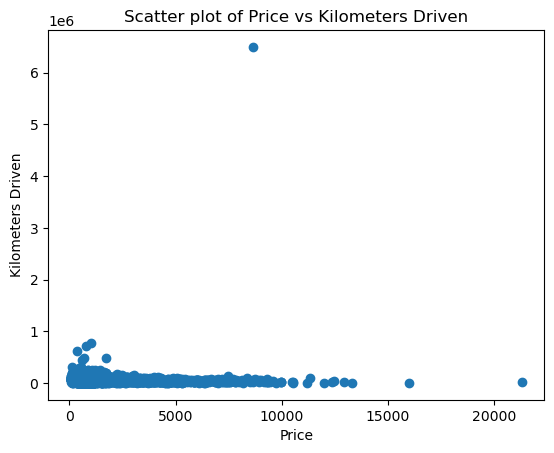

In [92]:
plt.scatter(df['Price'], df['Kilometers_Driven'])
plt.xlabel('Price')
plt.ylabel('Kilometers Driven')
plt.title('Scatter plot of Price vs Kilometers Driven')
plt.show()


In [93]:
max_kilometers = max(df['Kilometers_Driven'])

In [94]:
max_kilometers_index = df[df['Kilometers_Driven'] == max_kilometers].index
df = df.drop(max_kilometers_index)


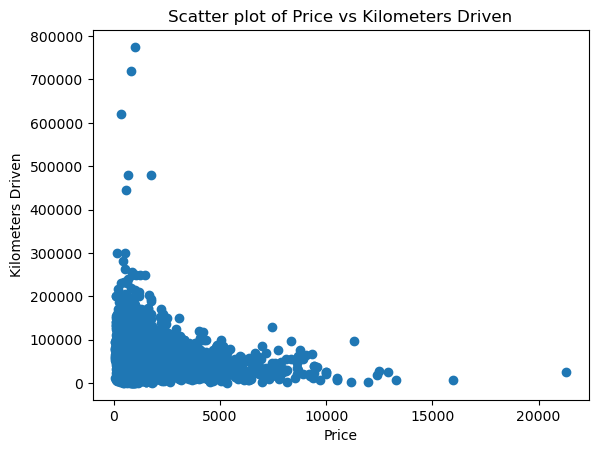

In [95]:
plt.scatter(df['Price'], df['Kilometers_Driven'])
plt.xlabel('Price')
plt.ylabel('Kilometers Driven')
plt.title('Scatter plot of Price vs Kilometers Driven')
plt.show()


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587 entries, 0 to 6018
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             5587 non-null   object 
 1   Year                             5587 non-null   int32  
 2   Kilometers_Driven                5587 non-null   int32  
 3   Owner_Type                       5587 non-null   int32  
 4   Mileage                          5587 non-null   float64
 5   Engine                           5587 non-null   float64
 6   Power                            5587 non-null   float64
 7   Seats                            5587 non-null   int32  
 8   Price                            5587 non-null   float64
 9   Price_per_KM                     5587 non-null   float64
 10  Brand                            5587 non-null   object 
 11  Condition                        5587 non-null   int32  
 12  Maintenance_Cost         

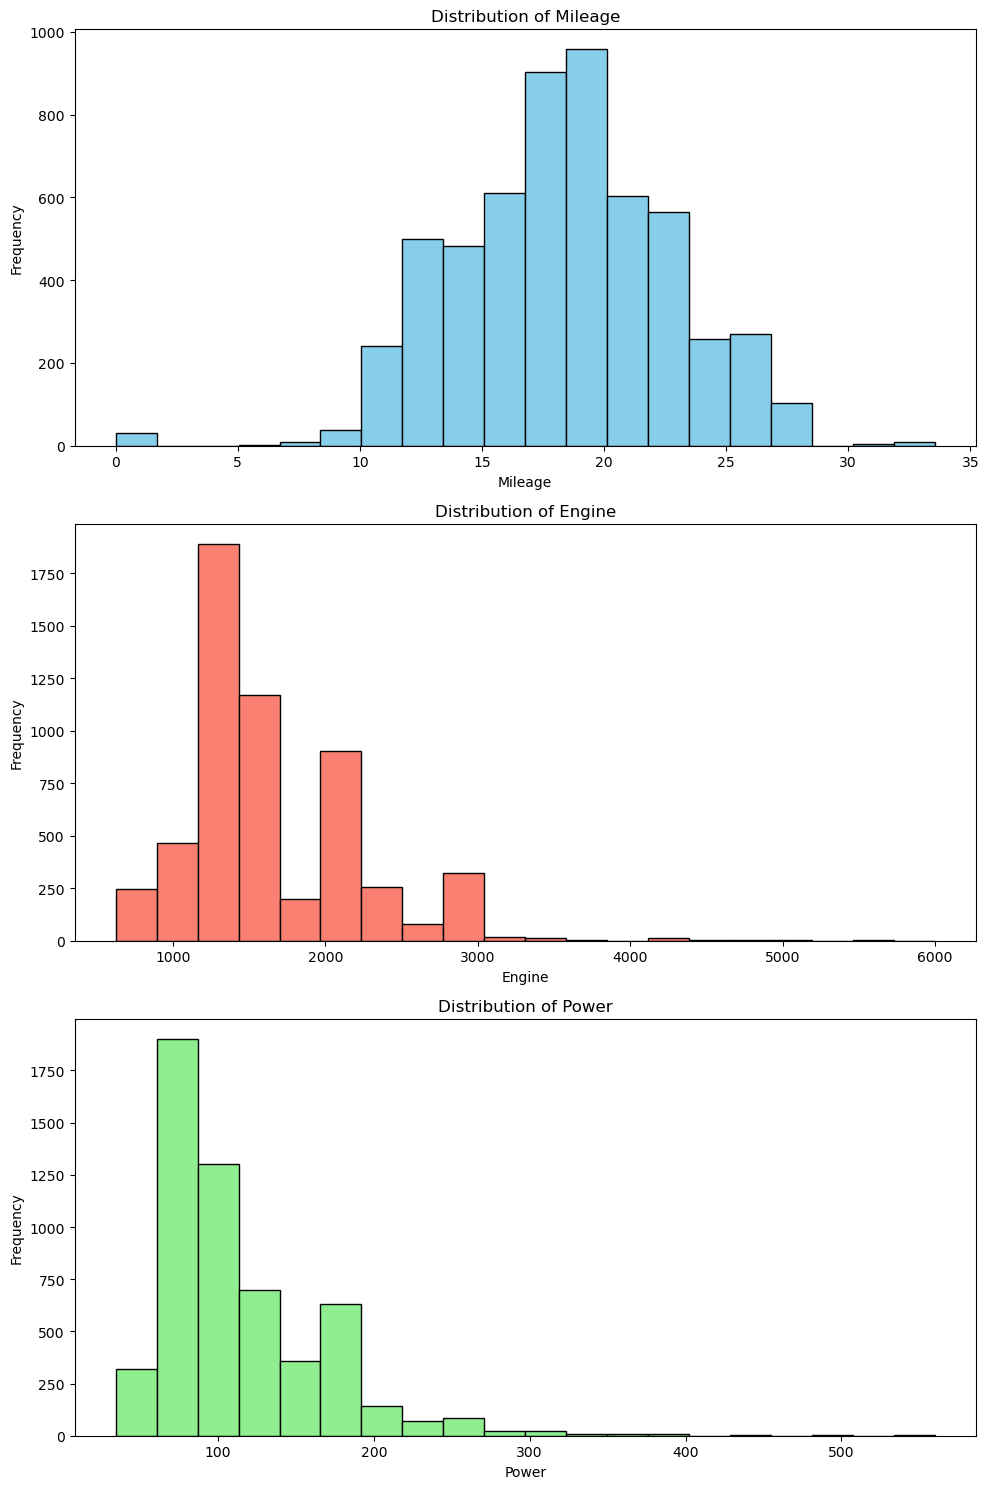

In [97]:
import matplotlib.pyplot as plt

# Create subplots for each numerical column
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot histograms for 'Mileage', 'Engine', and 'Power' columns
axs[0].hist(df['Mileage'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Mileage')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Engine'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Engine')
axs[1].set_xlabel('Engine')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['Power'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('Distribution of Power')
axs[2].set_xlabel('Power')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


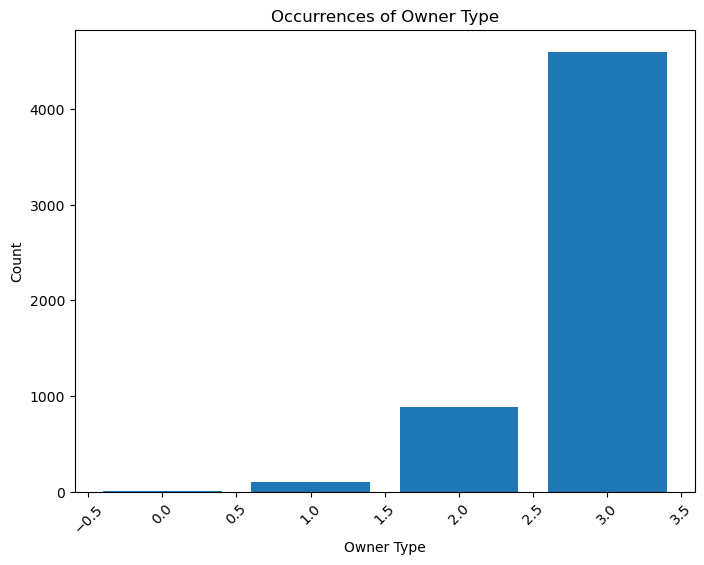

In [98]:
# Plot occurrences of each value for 'Owner_Type' column
plt.figure(figsize=(8, 6))
value_counts = df['Owner_Type'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Occurrences of Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\259455612.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')


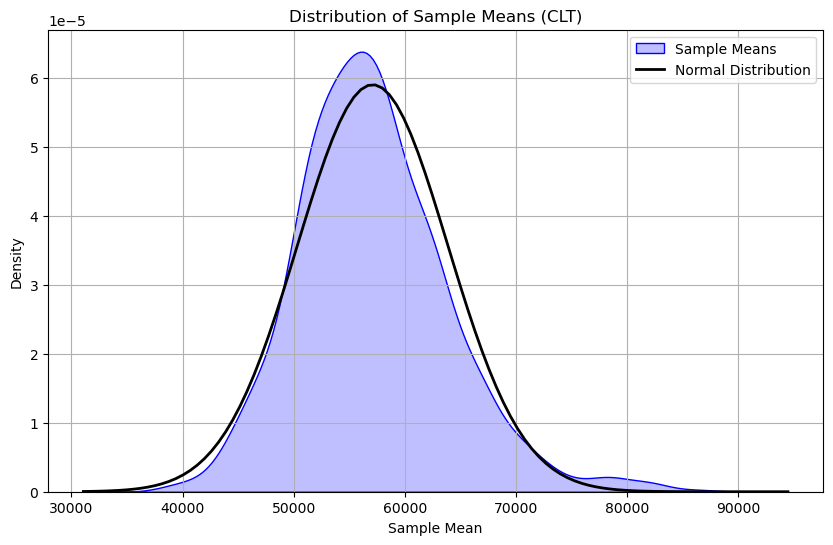

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Number of samples to generate
num_samples = 1000

# Size of each sample
sample_size = 30

# Generate random samples
samples = [np.random.choice(df['Kilometers_Driven'], size=sample_size, replace=True) for _ in range(num_samples)]

# Calculate the means of the samples
sample_means = np.mean(samples, axis=1)

# Plot the density curve of sample means
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')

# Plot the theoretical normal distribution
mu = np.mean(sample_means)
sigma = np.std(sample_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [100]:
df.dtypes

Name                                object
Year                                 int32
Kilometers_Driven                    int32
Owner_Type                           int32
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Price_per_KM                       float64
Brand                               object
Condition                            int32
Maintenance_Cost                   float64
Accident History                      bool
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmissio

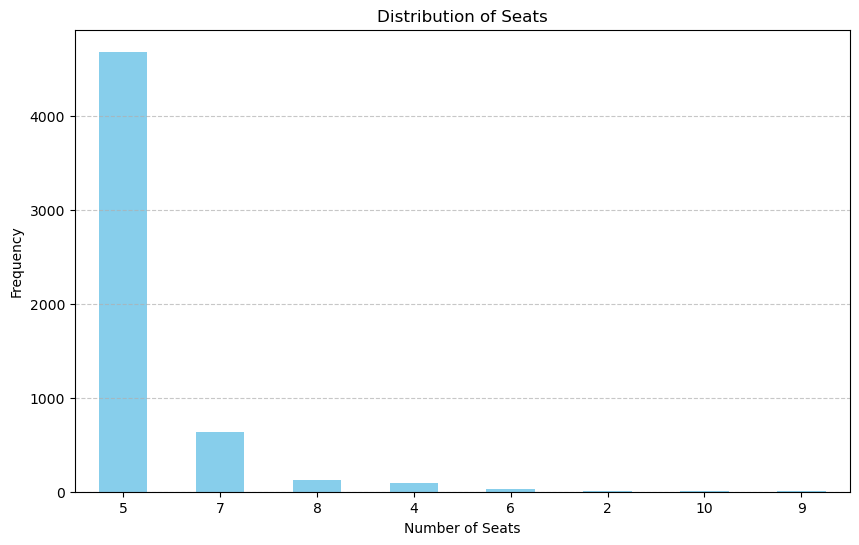

In [101]:
# Count the occurrences of each unique value in the 'Seats' column
seat_counts = df['Seats'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
seat_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

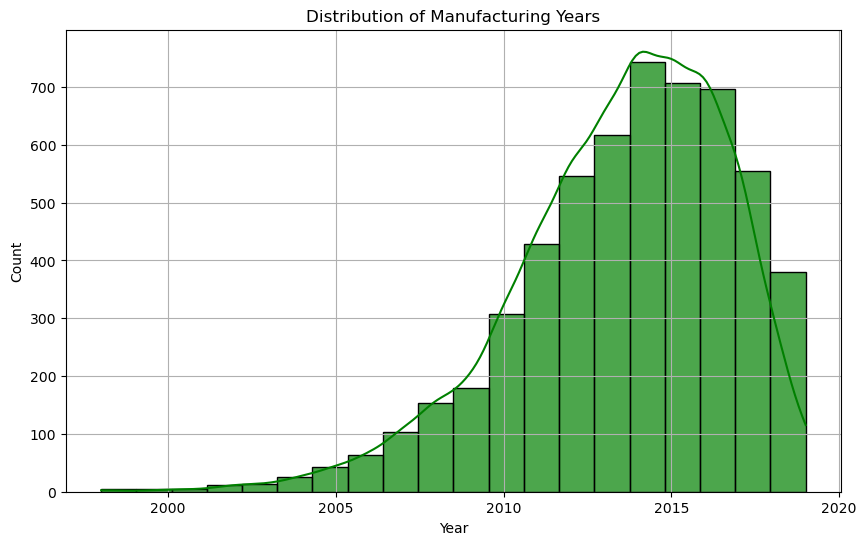

In [102]:
# Plot the histogram of 'Year' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='green', alpha=0.7)

plt.title('Distribution of Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\4022812897.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_sample_means, shade=True, color='blue', label='Price Means')


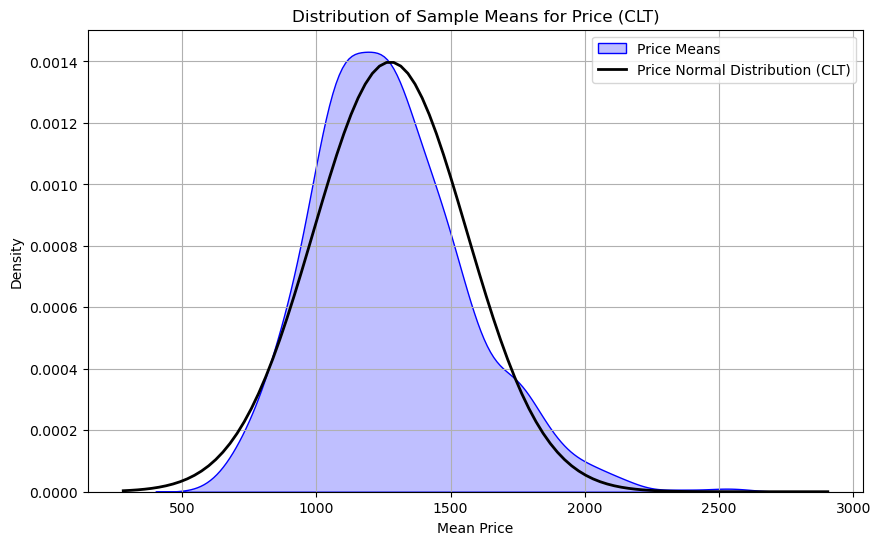

In [103]:
# Number of samples to generate
num_samples = 1000

# Size of each sample
sample_size = 30

# Generate random samples for Price
price_samples = [np.random.choice(df['Price'].dropna(), size=sample_size, replace=True) for _ in range(num_samples)]
price_sample_means = np.mean(price_samples, axis=1)

# Fit a normal distribution to the sample means
price_mu, price_std = norm.fit(price_sample_means)

# Plot the density plot of sample means for Price
plt.figure(figsize=(10, 6))
sns.kdeplot(price_sample_means, shade=True, color='blue', label='Price Means')

# Plot the fitted normal distribution for Price
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
price_p = norm.pdf(x, price_mu, price_std)
plt.plot(x, price_p, 'k', linewidth=2, label='Price Normal Distribution (CLT)')

plt.title('Distribution of Sample Means for Price (CLT)')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\128048069.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_per_km_sample_means, shade=True, color='red', label='Price_per_KM Means')


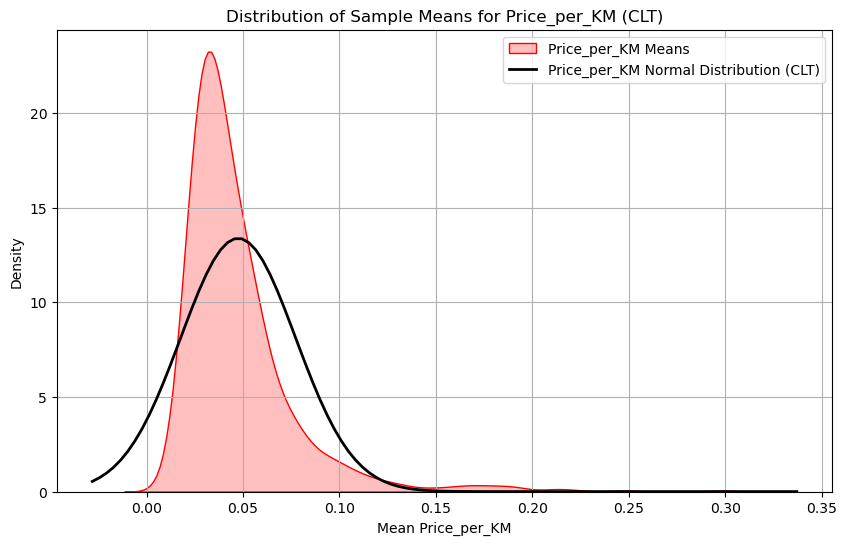

In [104]:

# Number of samples to generate
num_samples = 1000

# Size of each sample
sample_size = 30

# Generate random samples for Price_per_KM
price_per_km_samples = [np.random.choice(df['Price_per_KM'].dropna(), size=sample_size, replace=True) for _ in range(num_samples)]
price_per_km_sample_means = np.mean(price_per_km_samples, axis=1)

# Fit a normal distribution to the sample means
price_per_km_mu, price_per_km_std = norm.fit(price_per_km_sample_means)

# Plot the density plot of sample means for Price_per_KM
plt.figure(figsize=(10, 6))
sns.kdeplot(price_per_km_sample_means, shade=True, color='red', label='Price_per_KM Means')

# Plot the fitted normal distribution for Price_per_KM
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
price_per_km_p = norm.pdf(x, price_per_km_mu, price_per_km_std)
plt.plot(x, price_per_km_p, 'k', linewidth=2, label='Price_per_KM Normal Distribution (CLT)')

plt.title('Distribution of Sample Means for Price_per_KM (CLT)')
plt.xlabel('Mean Price_per_KM')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

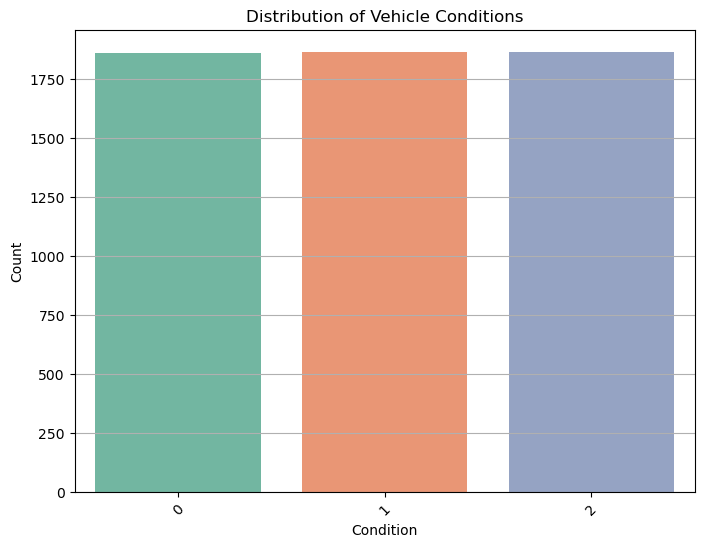

In [105]:
# Convert 'Condition' to categorical type
df['Condition'] = df['Condition'].astype('category')

# Plot the count of each condition
plt.figure(figsize=(8, 6))
sns.countplot(x='Condition', data=df, palette='Set2')
plt.title('Distribution of Vehicle Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\1339699233.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')


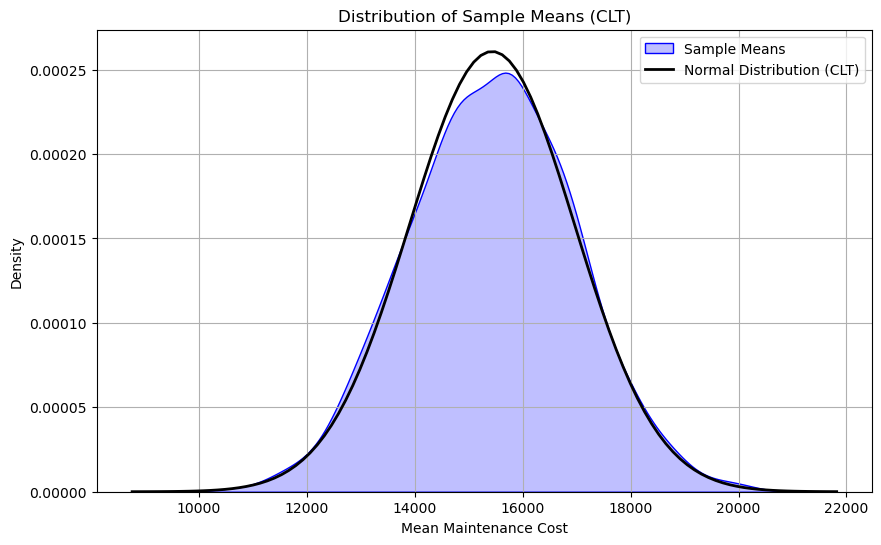

In [106]:
# Number of samples to generate
num_samples = 1000

# Size of each sample
sample_size = 30

# Generate random samples
samples = [np.random.choice(df['Maintenance_Cost'].dropna(), size=sample_size, replace=True) for _ in range(num_samples)]

# Calculate the means of the samples
sample_means = np.mean(samples, axis=1)

# Fit a normal distribution to the sample means
mu, std = norm.fit(sample_means)

# Plot the density plot of sample means
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution (CLT)')

plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Mean Maintenance Cost')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


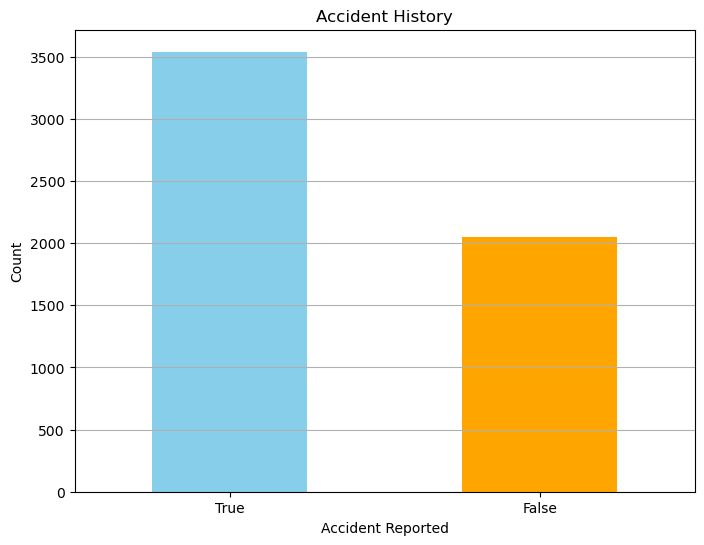

In [107]:
# Count the occurrences of each category
accident_counts = df['Accident History'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
accident_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Accident History')
plt.xlabel('Accident Reported')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


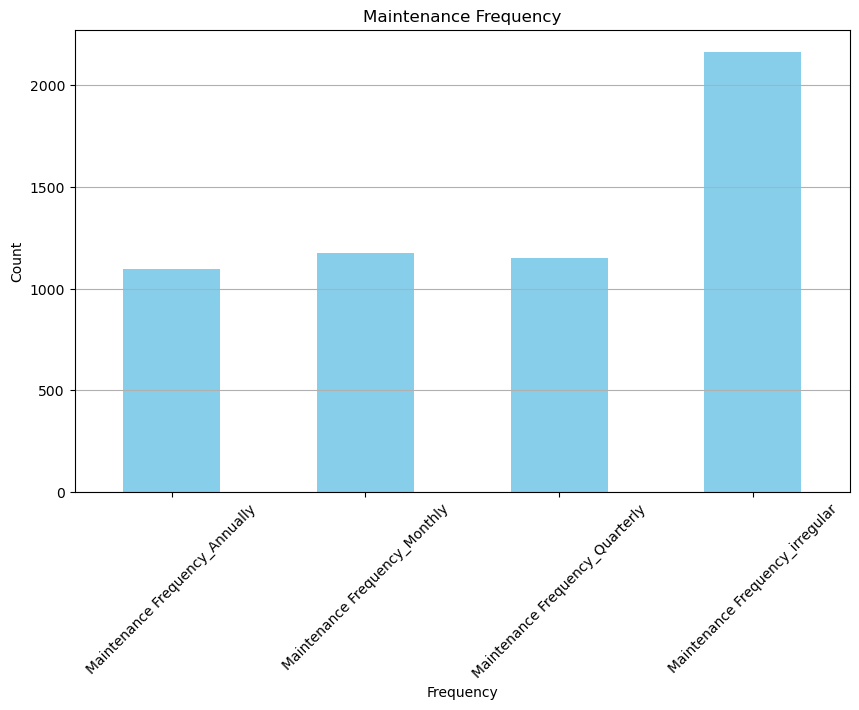

In [108]:
# Extract the columns
maintenance_cols = ['Maintenance Frequency_Annually', 'Maintenance Frequency_Monthly',
                    'Maintenance Frequency_Quarterly', 'Maintenance Frequency_irregular']

# Sum up the occurrences of each category
maintenance_counts = df[maintenance_cols].sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
maintenance_counts.plot(kind='bar', color='skyblue')
plt.title('Maintenance Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


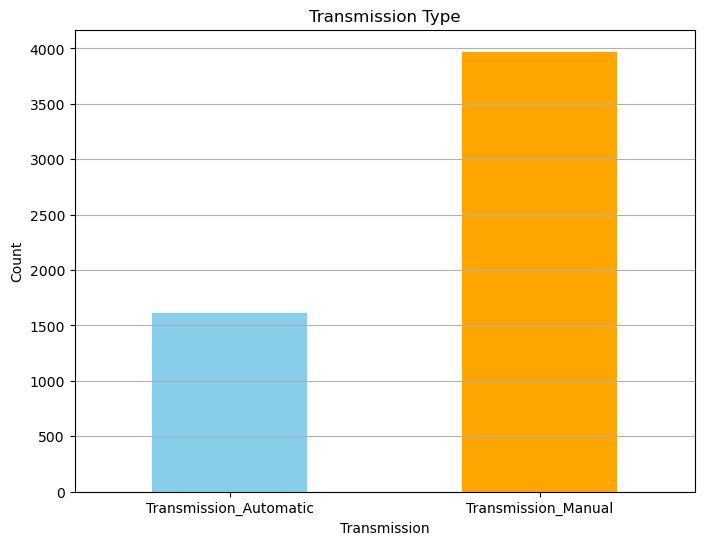

In [109]:
# Extract the columns
transmission_cols = ['Transmission_Automatic', 'Transmission_Manual']

# Sum up the occurrences of each category
transmission_counts = df[transmission_cols].sum()

# Plot the bar plot
plt.figure(figsize=(8, 6))
transmission_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


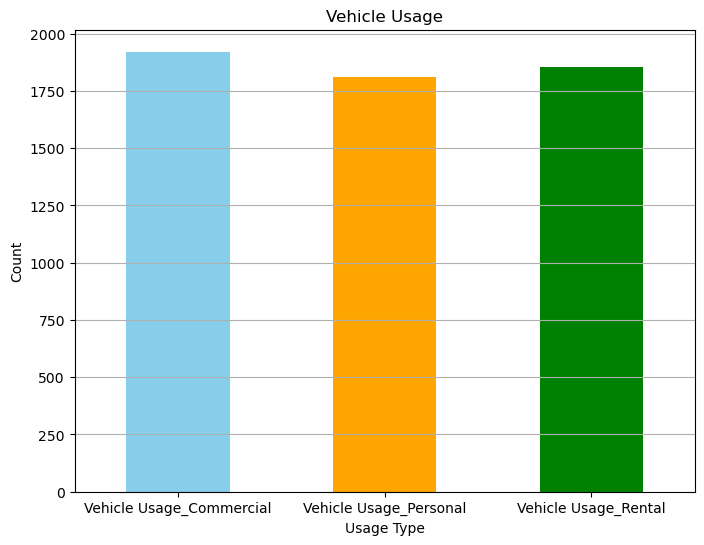

In [110]:
# Extract the columns
usage_cols = ['Vehicle Usage_Commercial', 'Vehicle Usage_Personal', 'Vehicle Usage_Rental']

# Sum up the occurrences of each category
usage_counts = df[usage_cols].sum()

# Plot the bar plot
plt.figure(figsize=(8, 6))
usage_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Vehicle Usage')
plt.xlabel('Usage Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


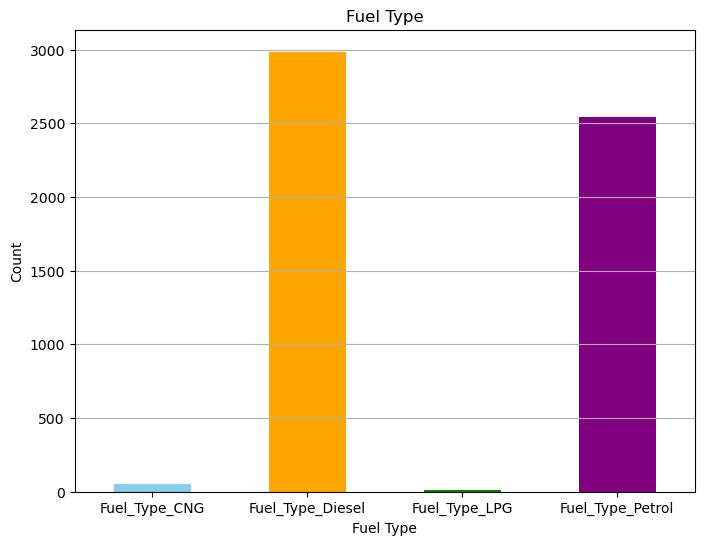

In [111]:
# Extract the columns
fuel_cols = ['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol']

# Sum up the occurrences of each category
fuel_counts = df[fuel_cols].sum()

# Plot the bar plot
plt.figure(figsize=(8, 6))
fuel_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\394900437.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fuel Efficiency Rating (km/l)'], shade=True, color='blue', label='Fuel Efficiency Rating')


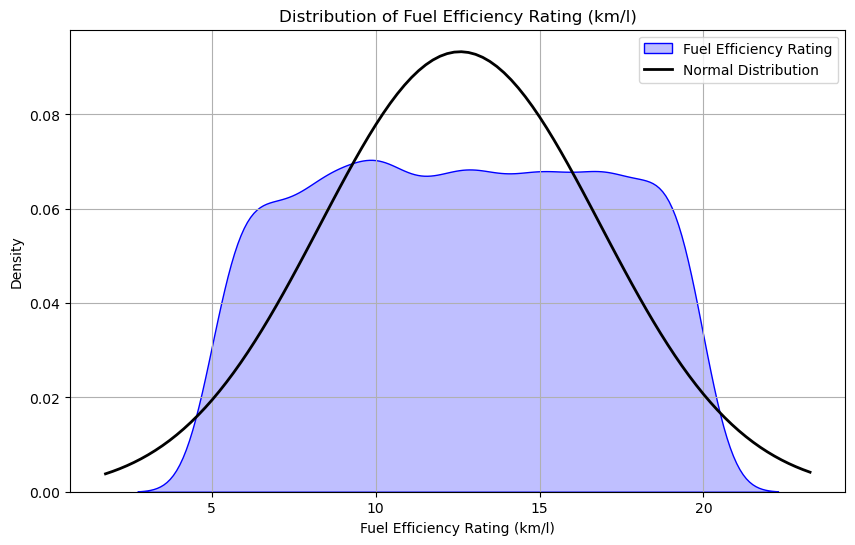

In [112]:
# Plot the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fuel Efficiency Rating (km/l)'], shade=True, color='blue', label='Fuel Efficiency Rating')

# Fit a normal distribution to the data
mu, std = norm.fit(df['Fuel Efficiency Rating (km/l)'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Distribution of Fuel Efficiency Rating (km/l)')
plt.xlabel('Fuel Efficiency Rating (km/l)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Bureau\AppData\Local\Temp\ipykernel_12920\925900391.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')


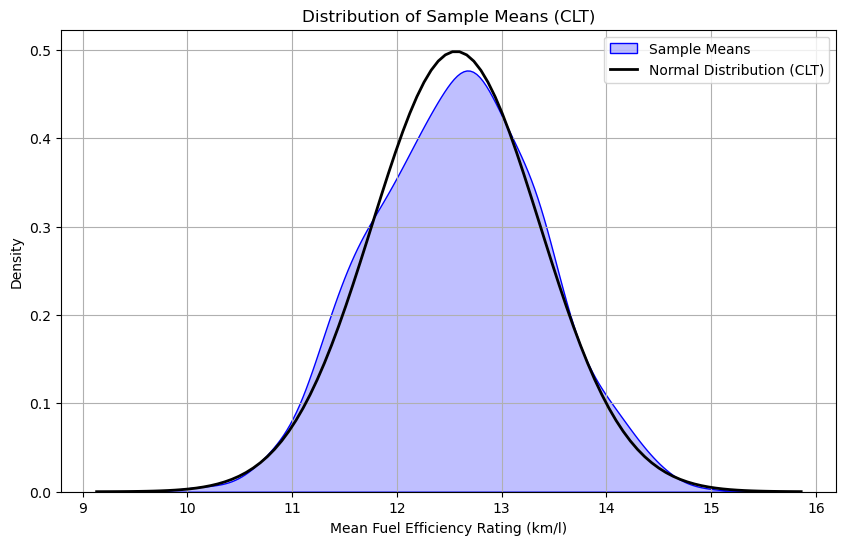

In [113]:
# Number of samples to generate
num_samples = 1000

# Size of each sample
sample_size = 30

# Generate random samples
samples = [np.random.choice(df['Fuel Efficiency Rating (km/l)'], size=sample_size, replace=True) for _ in range(num_samples)]

# Calculate the means of the samples
sample_means = np.mean(samples, axis=1)

# Fit a normal distribution to the sample means
mu, std = norm.fit(sample_means)

# Plot the density plot of sample means
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_means, shade=True, color='blue', label='Sample Means')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution (CLT)')

plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Mean Fuel Efficiency Rating (km/l)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


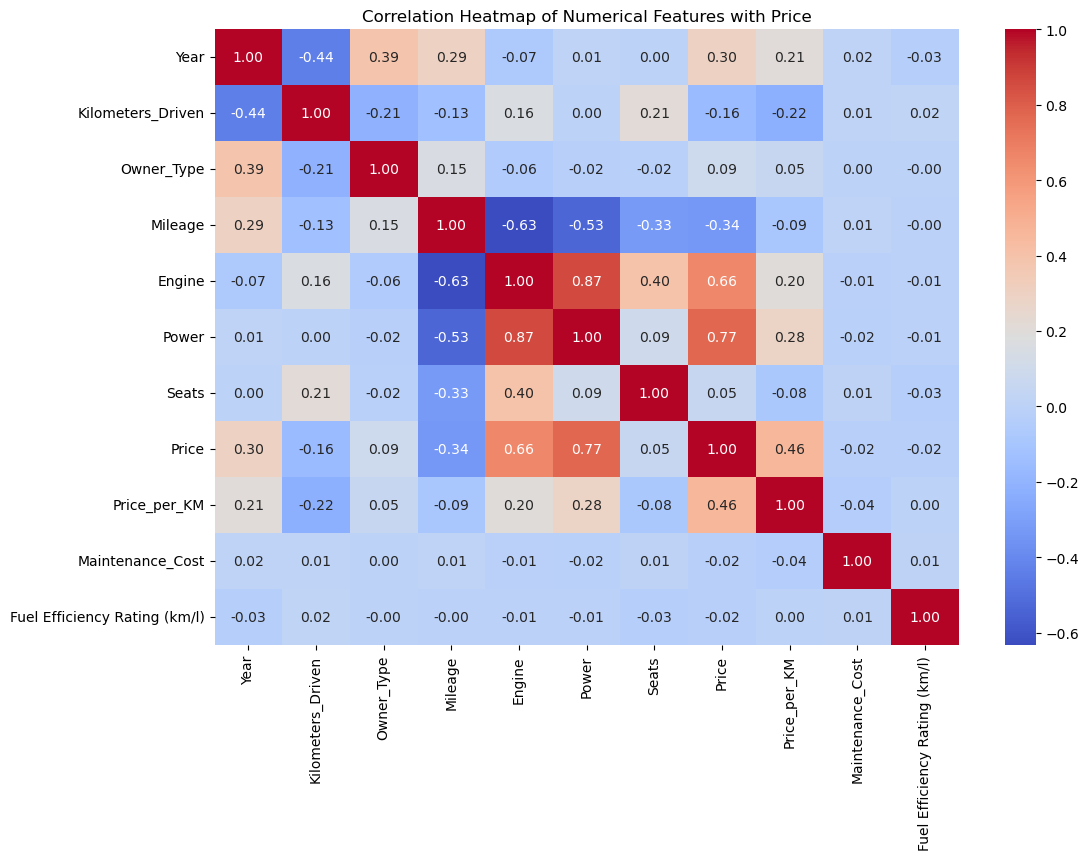

In [114]:

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features with Price')
plt.show()

From what we sow, we notice that the most factors that has linear relation with price are 'Engine', 'Power', 'Mileage'

# The Biggest Part!!!

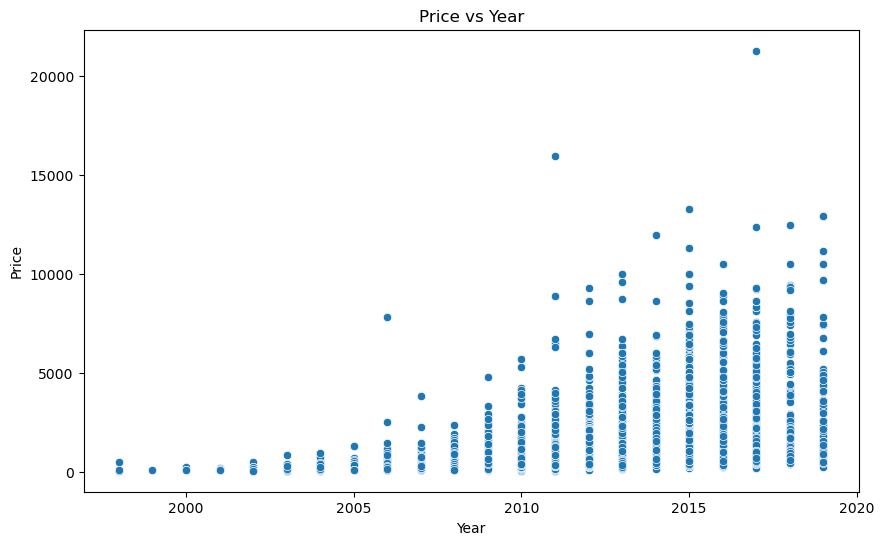

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


more visualisation

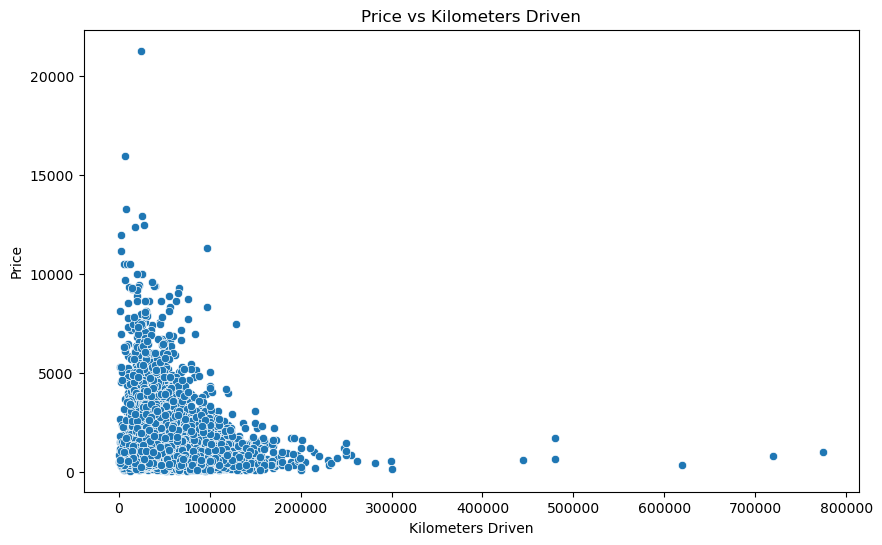

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()


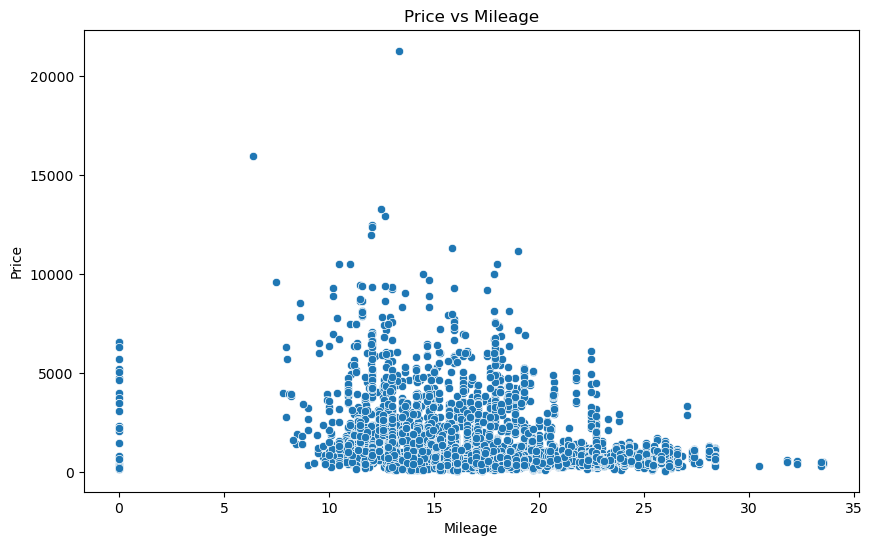

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


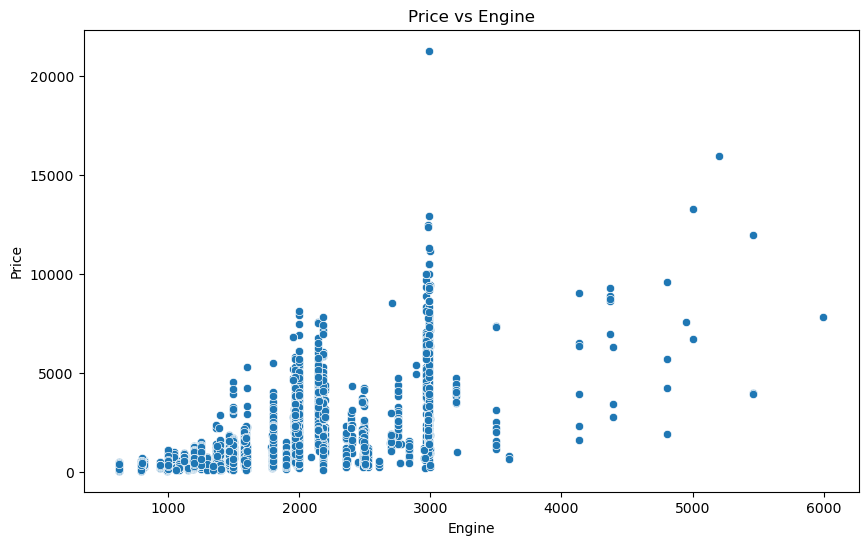

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Price', data=df)
plt.title('Price vs Engine')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()


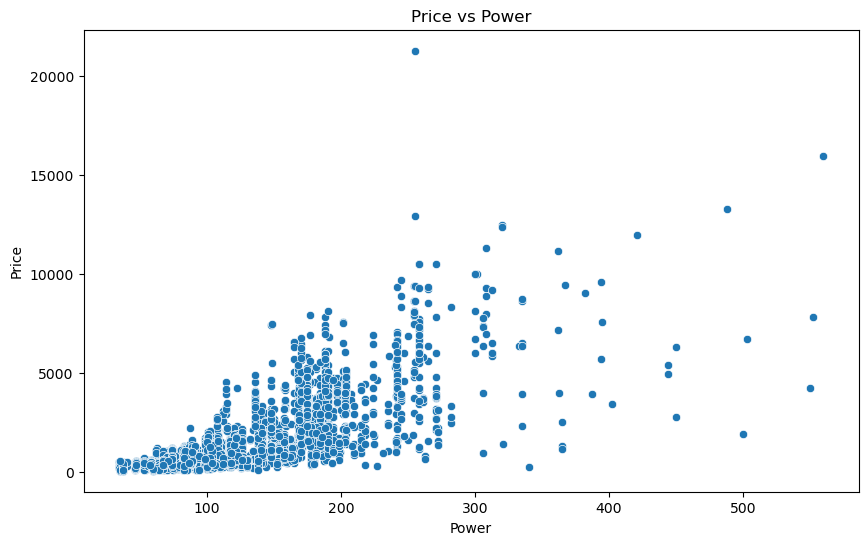

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power', y='Price', data=df)
plt.title('Price vs Power')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()


In [120]:
# Calculate the mean of non-zero Mileage values
mean_mileage = df[df['Mileage'] != 0]['Mileage'].mean()

# Fill missing values with the mean
df['Mileage'] = df['Mileage'].replace(0, mean_mileage)


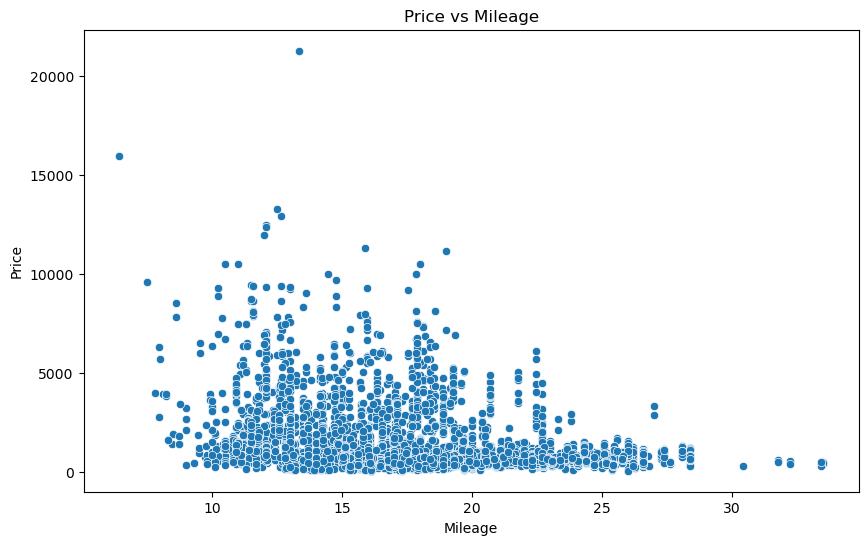

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [122]:
# Calculate the mean of non-null Engine values
mean_engine = df['Engine'].dropna().astype(float).mean()

# Fill missing values with the mean
df['Engine'] = df['Engine'].fillna(mean_engine)


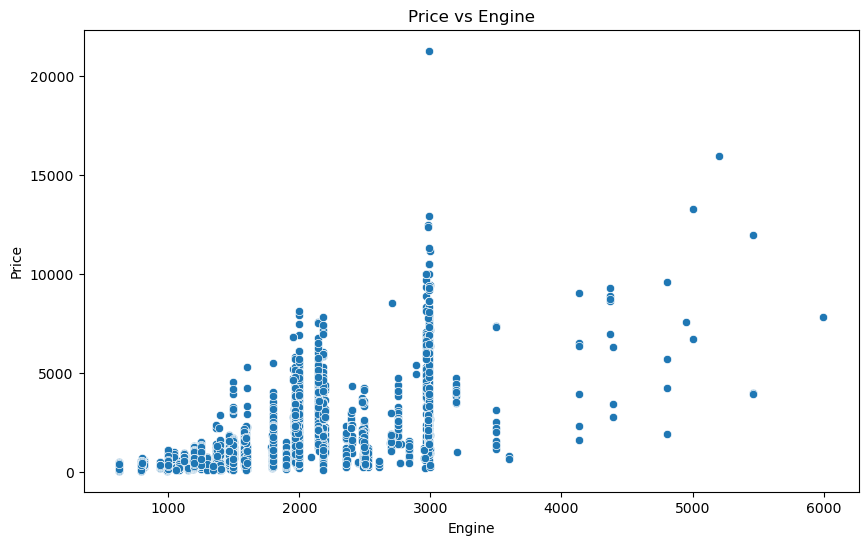

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Price', data=df)
plt.title('Price vs Engine')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()


# Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for linear regression
X_engine = df['Engine'].values.reshape(-1, 1)
y_price = df['Price'].values

# Create and fit the linear regression model for Engine vs Price
engine_model = LinearRegression()
engine_model.fit(X_engine, y_price)

# Print the coefficients
print("Linear Regression Coefficients (Engine vs Price):", engine_model.coef_)

# Predict prices using the linear regression model
predicted_prices_engine = engine_model.predict(X_engine)


Linear Regression Coefficients (Engine vs Price): [1.62955464]


In [125]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of polynomial
degree = 2

# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_engine_poly = poly_features.fit_transform(X_engine)

# Create and fit the polynomial regression model for Engine vs Price
poly_engine_model = LinearRegression()
poly_engine_model.fit(X_engine_poly, y_price)

# Predict prices using the polynomial regression model
predicted_prices_engine_poly = poly_engine_model.predict(X_engine_poly)


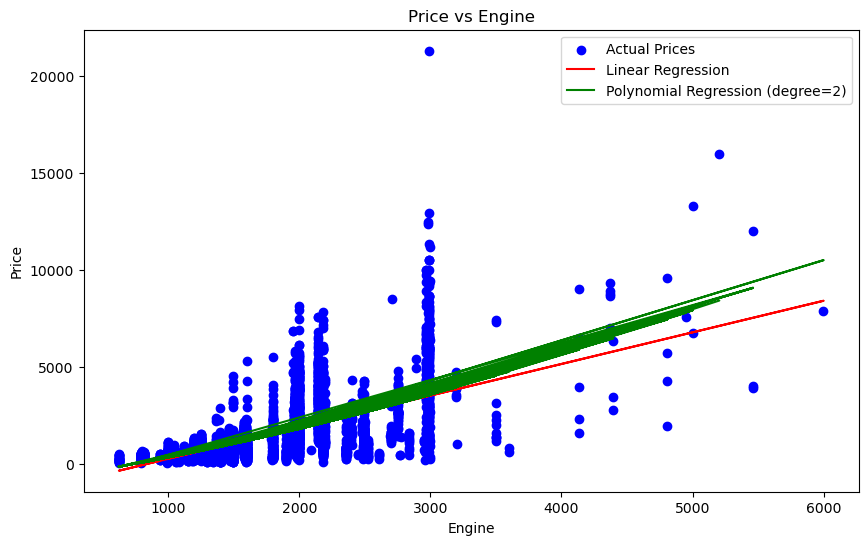

In [126]:
import matplotlib.pyplot as plt

# Scatter plot for Engine vs Price
plt.figure(figsize=(10, 6))
plt.scatter(X_engine, y_price, color='blue', label='Actual Prices')
plt.plot(X_engine, predicted_prices_engine, color='red', label='Linear Regression')
plt.plot(X_engine, predicted_prices_engine_poly, color='green', label='Polynomial Regression (degree={})'.format(degree))
plt.title('Price vs Engine')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.legend()
plt.show()


# Modeling

In [127]:
df.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_per_KM,Brand,Condition,Maintenance_Cost,Accident History,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
0,maruti wagon r lxi cng,2010,72000,3,26.60,998.0,58.16,5,232.8200,0.003234,Maruti,1,20371.0,True,17.54,True,False,False,False,True,False,False,False,True,False,False,False,True
2,honda jazz v,2011,46000,3,18.20,1199.0,88.70,5,598.6800,0.013015,Honda,0,7299.0,True,14.46,False,False,False,True,False,False,True,False,True,False,False,False,True
3,maruti ertiga vdi,2012,87000,3,20.77,1248.0,88.76,7,798.2400,0.009175,Maruti,2,13020.0,True,9.78,False,True,False,False,True,False,False,False,True,False,False,True,False
4,audi a4 new 2.0 tdi multitronic,2013,40670,2,15.20,1968.0,140.80,5,2360.1296,0.058031,Audi,0,12087.0,True,12.77,False,True,False,False,True,False,False,True,False,True,False,False,False
5,hyundai eon lpg era plus option,2012,75000,3,21.10,814.0,55.20,5,312.6440,0.004169,Hyundai,1,11692.0,True,16.90,False,False,True,False,True,False,False,False,True,False,False,False,True


In [132]:

df.drop(columns=['Name', 'Brand'], inplace=True)
df.drop(columns = 'Price_per_KM', inplace=True)
df['Condition'] = df['Condition'].astype('int32') 
df.dtypes


Year                                 int32
Kilometers_Driven                    int32
Owner_Type                           int32
Mileage                            float64
Engine                             float64
Power                              float64
Seats                                int32
Price                              float64
Condition                            int32
Maintenance_Cost                   float64
Accident History                      bool
Fuel Efficiency Rating (km/l)      float64
Fuel_Type_CNG                         bool
Fuel_Type_Diesel                      bool
Fuel_Type_LPG                         bool
Fuel_Type_Petrol                      bool
Vehicle Usage_Commercial              bool
Vehicle Usage_Personal                bool
Vehicle Usage_Rental                  bool
Transmission_Automatic                bool
Transmission_Manual                   bool
Maintenance Frequency_Annually        bool
Maintenance Frequency_Monthly         bool
Maintenance

In [133]:
# Assuming your dataframe is named 'df'

# Extracting features (X) and target variable (y) from your DataFrame
X = df.drop(columns=['Price'])
y = df['Price']


In [134]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Mean_Squared_error

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X and y are your features and target variable, respectively

# Creating a linear regression model
linear_regressor = LinearRegression()

# Performing cross-validation with error_score='raise'
cv_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Calculating the mean squared error across all folds
mean_cv_mse = -np.mean(cv_scores)

print("Mean Cross-Validation MSE (Simple Linear Regression):", mean_cv_mse)


Mean Cross-Validation MSE (Simple Linear Regression): 674682.2387826086


In [ ]:
import.math
sqrt(Simple Linear Regression)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
linear_regressor = LinearRegression()

# Training the model on the training set
linear_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error on Testing Set:", mse)


Mean Squared Error on Testing Set: 741140.6300889446


In [137]:
from sklearn.tree import DecisionTreeRegressor

# Creating a decision tree regressor model
tree_regressor = DecisionTreeRegressor()

# Training the model on the training set
tree_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_tree = tree_regressor.predict(X_test)

# Evaluating the model's performance using mean squared error
mse_tree = mean_squared_error(y_test, y_pred_tree)

print("Decision Tree - Mean Squared Error on Testing Set:", mse_tree)


Decision Tree - Mean Squared Error on Testing Set: 1209539.0243441768


In [138]:
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regressor model
forest_regressor = RandomForestRegressor()

# Training the model on the training set
forest_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_forest = forest_regressor.predict(X_test)

# Evaluating the model's performance using mean squared error
mse_forest = mean_squared_error(y_test, y_pred_forest)

print("Random Forest - Mean Squared Error on Testing Set:", mse_forest)


Random Forest - Mean Squared Error on Testing Set: 390620.8692047697


In [139]:
from xgboost import XGBRegressor

# Creating an XGBoost regressor model
xgb_regressor = XGBRegressor()

# Training the model on the training set
xgb_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluating the model's performance using mean squared error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("XGBoost - Mean Squared Error on Testing Set:", mse_xgb)


XGBoost - Mean Squared Error on Testing Set: 363124.31047248404


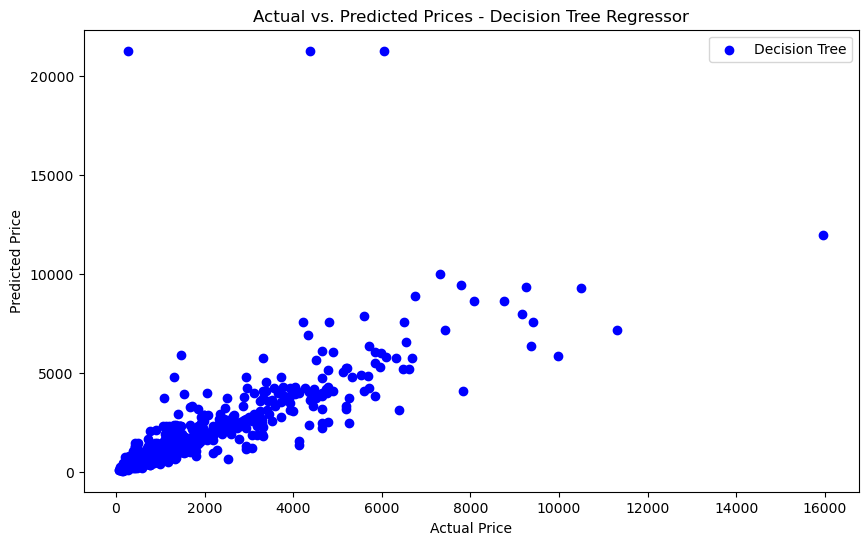

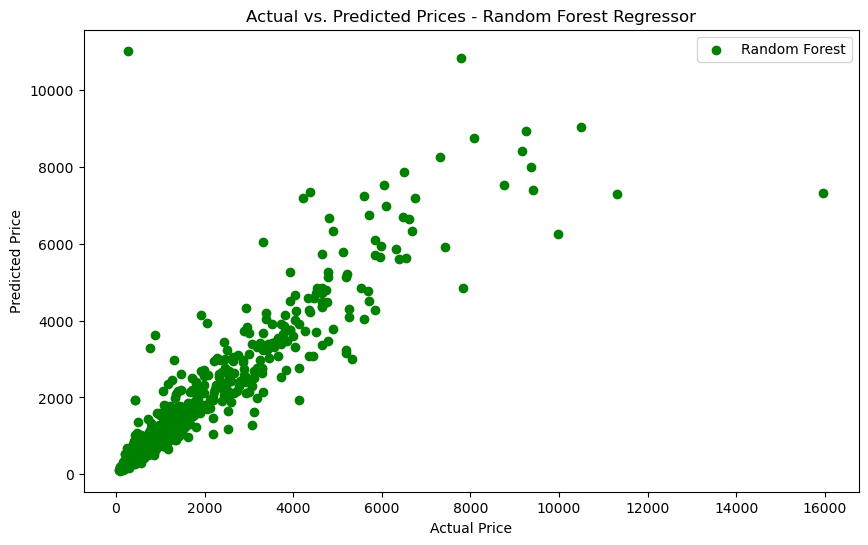

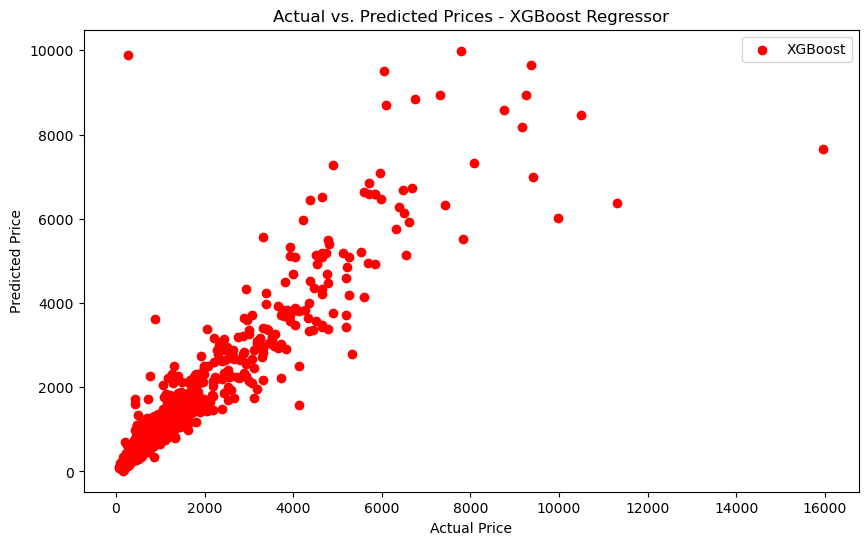

In [140]:
import matplotlib.pyplot as plt

# Creating a scatter plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Decision Tree')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices - Decision Tree Regressor')
plt.legend()
plt.show()

# Creating a scatter plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='green', label='Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices - Random Forest Regressor')
plt.legend()
plt.show()

# Creating a scatter plot for XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='red', label='XGBoost')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices - XGBoost Regressor')
plt.legend()
plt.show()


In [141]:
from sklearn.metrics import r2_score

# Calculate R2 score for Decision Tree Regressor
r2_tree = r2_score(y_test, y_pred_tree)

# Calculate R2 score for Random Forest Regressor
r2_forest = r2_score(y_test, y_pred_forest)

# Calculate R2 score for XGBoost Regressor
r2_xgb = r2_score(y_test, y_pred_xgb)

print("R2 Score - Decision Tree Regressor:", r2_tree)
print("R2 Score - Random Forest Regressor:", r2_forest)
print("R2 Score - XGBoost Regressor:", r2_xgb)


R2 Score - Decision Tree Regressor: 0.49889734090114624
R2 Score - Random Forest Regressor: 0.8381687962782777
R2 Score - XGBoost Regressor: 0.8495604078091972


In [142]:
from sklearn.metrics import r2_score

# Predict the target variable using the fitted model
y_pred_test = xgb_regressor.predict(X_test)

# Calculate the R2 score on the test set
r2_test = r2_score(y_test, y_pred_test)
print("R2 score on the test set:", r2_test)


R2 score on the test set: 0.8495604078091972


In [143]:
y_pred_test = xgb_regressor.predict(X_train)

# Calculate the R2 score on the test set
r2_test = r2_score(y_train, y_pred_test)
print("R2 score on the training set:", r2_test)

R2 score on the training set: 0.9965157495537524


In [144]:
X_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Condition,Maintenance_Cost,Accident History,Fuel Efficiency Rating (km/l),Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Vehicle Usage_Commercial,Vehicle Usage_Personal,Vehicle Usage_Rental,Transmission_Automatic,Transmission_Manual,Maintenance Frequency_Annually,Maintenance Frequency_Monthly,Maintenance Frequency_Quarterly,Maintenance Frequency_irregular
4812,2013,45348,2,19.01,1461.0,108.45,5,0,7884.0,True,16.25,False,True,False,False,False,True,False,False,True,False,False,False,True
3742,2017,24571,3,14.00,796.0,35.00,5,1,7177.0,True,17.70,False,False,False,True,True,False,False,False,True,False,True,False,False
4998,2015,66000,3,20.14,1498.0,88.00,5,2,8436.0,True,18.89,False,True,False,False,True,False,False,False,True,False,True,False,False
1269,2018,10600,3,33.44,796.0,40.30,4,1,28598.0,True,13.20,True,False,False,False,False,False,True,False,True,True,False,False,False
4027,2017,21363,3,13.00,1591.0,121.30,5,0,22596.0,False,5.78,False,False,False,True,False,True,False,True,False,False,False,True,False


In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [3, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
r2_test = best_model.score(X_test, y_test)
print("R2 score on the test set:", r2_test)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
R2 score on the test set: 0.8176977279642654


In [152]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random forest regressor
forest_reg = RandomForestRegressor(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Get the best estimator
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
r2_test = best_model.score(X_test, y_test)
print("R2 score on the test set:", r2_test)


C:\Users\Bureau\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bureau\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bureau\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Bureau\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Bureau\anaconda3\Lib\site-p

Best parameters: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 51}
R2 score on the test set: 0.7983967350680822


In [147]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Get the best estimator
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
r2_test = best_model.score(X_test, y_test)
print("R2 score on the test set:", r2_test)


Best parameters: {'algorithm': 'kd_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
R2 score on the test set: 0.33661912380208336


In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_train)

# Create a linear regression model
linear_reg = LinearRegression()

# Create a pipeline with polynomial features and linear regression
pipeline = make_pipeline(poly, linear_reg)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate R2 score on the test set
r2_test = r2_score(y_test, y_pred)
print("R2 score on the test set:", r2_test)


R2 score on the test set: 0.7918919738853221


In [149]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Create SVR model
svr_model = make_pipeline(StandardScaler(), SVR(kernel='linear'))  # You can use different kernels as well

# Fit the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Calculate R2 score on the test set
r2_test = r2_score(y_test, y_pred)
print("R2 score on the test set:", r2_test)


R2 score on the test set: 0.5747698473052137


In [150]:
from sklearn.metrics import r2_score

# Calculate R2 score for Decision Tree Regressor
r2_tree = r2_score(y_test, y_pred_tree)

# Calculate R2 score for Random Forest Regressor
r2_forest = r2_score(y_test, y_pred_forest)

# Calculate R2 score for XGBoost Regressor
r2_xgb = r2_score(y_test, y_pred_xgb)

print("R2 Score - Decision Tree Regressor:", r2_tree)
print("R2 Score - Random Forest Regressor:", r2_forest)
print("R2 Score - XGBoost Regressor:", r2_xgb)


R2 Score - Decision Tree Regressor: 0.49889734090114624
R2 Score - Random Forest Regressor: 0.8381687962782777
R2 Score - XGBoost Regressor: 0.8495604078091972


In [154]:
import pickle
pickle.dump(xgb_regressor, open('CloseAI.pkl','wb'))

In [156]:
regressor = pickle.load(open('CloseAI.pkl','rb'))
y_pred = regressor.predict(X)
mean_squared_error(y,y_pred)

78732.48750639474

In [157]:
%pip install flask

Note: you may need to restart the kernel to use updated packages.
